In [93]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu, ttest_ind, shapiro, chi2_contingency

In [94]:
# Identify project's root directory
project_path = os.path.dirname(os.getcwd())

# Data import: read clinical data as pandas dataframe
pxa_path = os.path.join(project_path, 'data' ,'pxa_deid_data_DF_final.csv')
pxa = pd.read_csv(pxa_path)
pxa.set_index('ID', inplace=True)

In [95]:
# Create the two groups based on the "tumor-epilepsy" column
pxa_initial_sz = pxa[pxa['first_tumor_sz'] == 1]
pxa_initial_other = pxa[pxa['first_tumor_sz'] == 0]
pxa_tre = pxa[pxa['tumor_epilepsy'] == 1]
pxa_no_tre = pxa[pxa['tumor_epilepsy'] == 0]

## Table 1: Clinical characteristics of seizures vs. no seizures

### Totals

In [96]:
# Calculate the total number of patients in each group
total_initial_sz = len(pxa_initial_sz)
total_initial_other = len(pxa_initial_other)
total_tre = len(pxa_tre)
total_no_tre = len(pxa_no_tre)

# Calculate the total number of patients
total_patients = total_initial_sz + total_initial_other

# Calculate the proportion of total for each group
prop_initial_sz = total_initial_sz / total_patients
prop_initial_other = total_initial_other / total_patients
prop_tre = total_tre / total_patients
prop_no_tre = total_no_tre / total_patients

print(f"Total number of patients in pxa_initial_sz: {total_initial_sz}")
print(f"Proportion of total patients in pxa_initial_sz: {prop_initial_sz:.2f}")

print(f"Total number of patients in pxa_initial_other: {total_initial_other}")
print(f"Proportion of total patients in pxa_initial_other: {prop_initial_other:.2f}")

print(f"Total number of patients in pxa_tre: {total_tre}")
print(f"Proportion of total patients in pxa_tre: {prop_tre:.2f}")

print(f"Total number of patients in pxa_no_tre: {total_no_tre}")
print(f"Proportion of total patients in pxa_no_tre: {prop_no_tre:.2f}")

Total number of patients in pxa_initial_sz: 25
Proportion of total patients in pxa_initial_sz: 0.71
Total number of patients in pxa_initial_other: 10
Proportion of total patients in pxa_initial_other: 0.29
Total number of patients in pxa_tre: 27
Proportion of total patients in pxa_tre: 0.77
Total number of patients in pxa_no_tre: 8
Proportion of total patients in pxa_no_tre: 0.23


### Continuous t-tests: age of onset, tumor size

In [97]:
from scipy.stats import mannwhitneyu, ttest_ind, shapiro
import pandas as pd

# Assuming pxa_initial_sz, pxa_initial_other, pxa_tre, and pxa_no_tre are your DataFrames

# Calculate the median age and range for each group
def calculate_median_and_range(df, column):
    median = df[column].median()
    min_val = df[column].min()
    max_val = df[column].max()
    return median, min_val, max_val

median_age_initial_sz, min_age_initial_sz, max_age_initial_sz = calculate_median_and_range(pxa_initial_sz, 'presentation_1_age')
median_age_initial_other, min_age_initial_other, max_age_initial_other = calculate_median_and_range(pxa_initial_other, 'presentation_1_age')
median_age_tre, min_age_tre, max_age_tre = calculate_median_and_range(pxa_tre, 'presentation_1_age')
median_age_no_tre, min_age_no_tre, max_age_no_tre = calculate_median_and_range(pxa_no_tre, 'presentation_1_age')

print(f"Median age of initial presentation in pxa_initial_sz: {median_age_initial_sz}")
print(f"Range of age of initial presentation in pxa_initial_sz: {min_age_initial_sz} - {max_age_initial_sz}")

print(f"Median age of initial presentation in pxa_initial_other: {median_age_initial_other}")
print(f"Range of age of initial presentation in pxa_initial_other: {min_age_initial_other} - {max_age_initial_other}")

print(f"Median age of initial presentation in pxa_tre: {median_age_tre}")
print(f"Range of age of initial presentation in pxa_tre: {min_age_tre} - {max_age_tre}")

print(f"Median age of initial presentation in pxa_no_tre: {median_age_no_tre}")
print(f"Range of age of initial presentation in pxa_no_tre: {min_age_no_tre} - {max_age_no_tre}")

# Check for normality using the Shapiro-Wilk test
def check_normality(df, column):
    return shapiro(df[column])

shapiro_sz = check_normality(pxa_initial_sz, 'presentation_1_age')
shapiro_other = check_normality(pxa_initial_other, 'presentation_1_age')
shapiro_tre = check_normality(pxa_tre, 'presentation_1_age')
shapiro_no_tre = check_normality(pxa_no_tre, 'presentation_1_age')

print(f"Shapiro-Wilk test for pxa_initial_sz: {shapiro_sz}")
print(f"Shapiro-Wilk test for pxa_initial_other: {shapiro_other}")
print(f"Shapiro-Wilk test for pxa_tre: {shapiro_tre}")
print(f"Shapiro-Wilk test for pxa_no_tre: {shapiro_no_tre}")

# Perform the appropriate test based on normality
def perform_statistical_test(df1, df2, column):
    shapiro1 = check_normality(df1, column)
    shapiro2 = check_normality(df2, column)
    if shapiro1.pvalue > 0.05 and shapiro2.pvalue > 0.05:
        t_statistic, p_value = ttest_ind(df1[column], df2[column])
        test_used = "t-test"
    else:
        u_statistic, p_value = mannwhitneyu(df1[column], df2[column])
        test_used = "Mann-Whitney U test"
    return test_used, t_statistic if test_used == "t-test" else u_statistic, p_value

test_used_age, statistic_age, p_value_age = perform_statistical_test(pxa_initial_sz, pxa_initial_other, 'presentation_1_age')
print(f"{test_used_age} for age of initial presentation: statistic={statistic_age}, p-value={p_value_age}")

test_used_age_tre, statistic_age_tre, p_value_age_tre = perform_statistical_test(pxa_tre, pxa_no_tre, 'presentation_1_age')
print(f"{test_used_age_tre} for age of initial presentation: statistic={statistic_age_tre}, p-value={p_value_age_tre}")

# Ensure tumor_size is numeric, converting non-numeric values to NaN and then dropping them
def filter_numeric(df, column):
    df_filtered = df.copy()
    df_filtered[column] = pd.to_numeric(df_filtered[column], errors='coerce')
    return df_filtered.dropna(subset=[column])

# Filter and analyze tumor_size
pxa_initial_sz_filtered = filter_numeric(pxa_initial_sz, 'tumor_size')
pxa_initial_other_filtered = filter_numeric(pxa_initial_other, 'tumor_size')
pxa_tre_filtered = filter_numeric(pxa_tre, 'tumor_size')
pxa_no_tre_filtered = filter_numeric(pxa_no_tre, 'tumor_size')

# Calculate the mean tumor size and standard deviation for each group
def calculate_mean_and_std(df, column):
    mean = df[column].mean()
    std = df[column].std()
    return mean, std

mean_tumor_size_initial_sz, std_tumor_size_initial_sz = calculate_mean_and_std(pxa_initial_sz_filtered, 'tumor_size')
mean_tumor_size_initial_other, std_tumor_size_initial_other = calculate_mean_and_std(pxa_initial_other_filtered, 'tumor_size')
mean_tumor_size_tre, std_tumor_size_tre = calculate_mean_and_std(pxa_tre_filtered, 'tumor_size')
mean_tumor_size_no_tre, std_tumor_size_no_tre = calculate_mean_and_std(pxa_no_tre_filtered, 'tumor_size')

print(f"Mean tumor size in pxa_initial_sz: {mean_tumor_size_initial_sz}")
print(f"Standard deviation of tumor size in pxa_initial_sz: {std_tumor_size_initial_sz}")

print(f"Mean tumor size in pxa_initial_other: {mean_tumor_size_initial_other}")
print(f"Standard deviation of tumor size in pxa_initial_other: {std_tumor_size_initial_other}")

print(f"Mean tumor size in pxa_tre: {mean_tumor_size_tre}")
print(f"Standard deviation of tumor size in pxa_tre: {std_tumor_size_tre}")

print(f"Mean tumor size in pxa_no_tre: {mean_tumor_size_no_tre}")
print(f"Standard deviation of tumor size in pxa_no_tre: {std_tumor_size_no_tre}")

# Check for normality using the Shapiro-Wilk test
shapiro_tumor_size_sz = check_normality(pxa_initial_sz_filtered, 'tumor_size')
shapiro_tumor_size_other = check_normality(pxa_initial_other_filtered, 'tumor_size')
shapiro_tumor_size_tre = check_normality(pxa_tre_filtered, 'tumor_size')
shapiro_tumor_size_no_tre = check_normality(pxa_no_tre_filtered, 'tumor_size')

print(f"Shapiro-Wilk test for tumor size in pxa_initial_sz: {shapiro_tumor_size_sz}")
print(f"Shapiro-Wilk test for tumor size in pxa_initial_other: {shapiro_tumor_size_other}")
print(f"Shapiro-Wilk test for tumor size in pxa_tre: {shapiro_tumor_size_tre}")
print(f"Shapiro-Wilk test for tumor size in pxa_no_tre: {shapiro_tumor_size_no_tre}")

# Perform the appropriate test based on normality
test_used_tumor_size, statistic_tumor_size, p_value_tumor_size = perform_statistical_test(pxa_initial_sz_filtered, pxa_initial_other_filtered, 'tumor_size')
print(f"{test_used_tumor_size} for tumor size: statistic={statistic_tumor_size}, p-value={p_value_tumor_size}")

test_used_tumor_size_tre, statistic_tumor_size_tre, p_value_tumor_size_tre = perform_statistical_test(pxa_tre_filtered, pxa_no_tre_filtered, 'tumor_size')
print(f"{test_used_tumor_size_tre} for tumor size: statistic={statistic_tumor_size_tre}, p-value={p_value_tumor_size_tre}")

# Ensure tumor_mutational_burden is numeric, converting non-numeric values to NaN and then dropping them
pxa_initial_sz_filtered = filter_numeric(pxa_initial_sz, 'tumor_mutational_burden')
pxa_initial_other_filtered = filter_numeric(pxa_initial_other, 'tumor_mutational_burden')
pxa_tre_filtered = filter_numeric(pxa_tre, 'tumor_mutational_burden')
pxa_no_tre_filtered = filter_numeric(pxa_no_tre, 'tumor_mutational_burden')

# Calculate the mean tumor mutational burden and standard deviation for each group
mean_tumor_mutational_burden_initial_sz, std_tumor_mutational_burden_initial_sz = calculate_mean_and_std(pxa_initial_sz_filtered, 'tumor_mutational_burden')
mean_tumor_mutational_burden_initial_other, std_tumor_mutational_burden_initial_other = calculate_mean_and_std(pxa_initial_other_filtered, 'tumor_mutational_burden')
mean_tumor_mutational_burden_tre, std_tumor_mutational_burden_tre = calculate_mean_and_std(pxa_tre_filtered, 'tumor_mutational_burden')
mean_tumor_mutational_burden_no_tre, std_tumor_mutational_burden_no_tre = calculate_mean_and_std(pxa_no_tre_filtered, 'tumor_mutational_burden')

print(f"Mean tumor mutational burden in pxa_initial_sz: {mean_tumor_mutational_burden_initial_sz}")
print(f"Standard deviation of tumor mutational burden in pxa_initial_sz: {std_tumor_mutational_burden_initial_sz}")

print(f"Mean tumor mutational burden in pxa_initial_other: {mean_tumor_mutational_burden_initial_other}")
print(f"Standard deviation of tumor mutational burden in pxa_initial_other: {std_tumor_mutational_burden_initial_other}")

print(f"Mean tumor mutational burden in pxa_tre: {mean_tumor_mutational_burden_tre}")
print(f"Standard deviation of tumor mutational burden in pxa_tre: {std_tumor_mutational_burden_tre}")

print(f"Mean tumor mutational burden in pxa_no_tre: {mean_tumor_mutational_burden_no_tre}")
print(f"Standard deviation of tumor mutational burden in pxa_no_tre: {std_tumor_mutational_burden_no_tre}")

# Check for normality using the Shapiro-Wilk test
shapiro_tumor_mutational_burden_sz = check_normality(pxa_initial_sz_filtered, 'tumor_mutational_burden')
shapiro_tumor_mutational_burden_other = check_normality(pxa_initial_other_filtered, 'tumor_mutational_burden')
shapiro_tumor_mutational_burden_tre = check_normality(pxa_tre_filtered, 'tumor_mutational_burden')
shapiro_tumor_mutational_burden_no_tre = check_normality(pxa_no_tre_filtered, 'tumor_mutational_burden')

print(f"Shapiro-Wilk test for tumor mutational burden in pxa_initial_sz: {shapiro_tumor_mutational_burden_sz}")
print(f"Shapiro-Wilk test for tumor mutational burden in pxa_initial_other: {shapiro_tumor_mutational_burden_other}")
print(f"Shapiro-Wilk test for tumor mutational burden in pxa_tre: {shapiro_tumor_mutational_burden_tre}")
print(f"Shapiro-Wilk test for tumor mutational burden in pxa_no_tre: {shapiro_tumor_mutational_burden_no_tre}")

# Perform the appropriate test based on normality
test_used_tumor_mutational_burden, statistic_tumor_mutational_burden, p_value_tumor_mutational_burden = perform_statistical_test(pxa_initial_sz_filtered, pxa_initial_other_filtered, 'tumor_mutational_burden')
print(f"{test_used_tumor_mutational_burden} for tumor mutational burden: statistic={statistic_tumor_mutational_burden}, p-value={p_value_tumor_mutational_burden}")

test_used_tumor_mutational_burden_tre, statistic_tumor_mutational_burden_tre, p_value_tumor_mutational_burden_tre = perform_statistical_test(pxa_tre_filtered, pxa_no_tre_filtered, 'tumor_mutational_burden')
print(f"{test_used_tumor_mutational_burden_tre} for tumor mutational burden: statistic={statistic_tumor_mutational_burden_tre}, p-value={p_value_tumor_mutational_burden_tre}")

Median age of initial presentation in pxa_initial_sz: 21.0
Range of age of initial presentation in pxa_initial_sz: 1.0 - 44.0
Median age of initial presentation in pxa_initial_other: 27.5
Range of age of initial presentation in pxa_initial_other: 17.0 - 50.0
Median age of initial presentation in pxa_tre: 21.0
Range of age of initial presentation in pxa_tre: 1.0 - 50.0
Median age of initial presentation in pxa_no_tre: 23.5
Range of age of initial presentation in pxa_no_tre: 17.0 - 37.0
Shapiro-Wilk test for pxa_initial_sz: ShapiroResult(statistic=0.9614605839251621, pvalue=0.4443273424053185)
Shapiro-Wilk test for pxa_initial_other: ShapiroResult(statistic=0.9131722454335092, pvalue=0.3034994966137838)
Shapiro-Wilk test for pxa_tre: ShapiroResult(statistic=0.963892431084562, pvalue=0.4512085635830397)
Shapiro-Wilk test for pxa_no_tre: ShapiroResult(statistic=0.8748435864469997, pvalue=0.16800325922697204)
t-test for age of initial presentation: statistic=-1.8757423118356389, p-value=0.0

### Chi square test for categorical data: female/male, tumor grade, tumor laterality

In [98]:
from scipy.stats import chi2_contingency, fisher_exact
import pandas as pd

def perform_test(group1, group2, column_name):
    # Ensure the column is numeric, converting non-numeric values to NaN and then dropping them
    group1_filtered = group1.copy()
    group1_filtered[column_name] = pd.to_numeric(group1_filtered[column_name], errors='coerce')
    group1_filtered = group1_filtered.dropna(subset=[column_name])

    group2_filtered = group2.copy()
    group2_filtered[column_name] = pd.to_numeric(group2_filtered[column_name], errors='coerce')
    group2_filtered = group2_filtered.dropna(subset=[column_name])

    # Calculate the total numbers of 1s and 0s in each group
    total_1_group1 = (group1_filtered[column_name] == 1).sum()
    total_0_group1 = (group1_filtered[column_name] == 0).sum()

    total_1_group2 = (group2_filtered[column_name] == 1).sum()
    total_0_group2 = (group2_filtered[column_name] == 0).sum()

    # Calculate the proportions
    proportion_1_group1 = total_1_group1 / (total_1_group1 + total_0_group1)
    proportion_1_group2 = total_1_group2 / (total_1_group2 + total_0_group2)

    print(f"Total number of 1s in {column_name} for group1: {total_1_group1}")
    print(f"Total number of 0s in {column_name} for group1: {total_0_group1}")
    print(f"Proportion of 1s in {column_name} for group1: {proportion_1_group1:.2f}")

    print(f"Total number of 1s in {column_name} for group2: {total_1_group2}")
    print(f"Total number of 0s in {column_name} for group2: {total_0_group2}")
    print(f"Proportion of 1s in {column_name} for group2: {proportion_1_group2:.2f}")

    # Create the contingency table
    contingency_table = [
        [total_1_group1, total_0_group1],
        [total_1_group2, total_0_group2]
    ]

    # Perform the Chi-Square test or Fisher's Exact Test
    if min(total_1_group1, total_0_group1, total_1_group2, total_0_group2) < 5:
        # Use Fisher's Exact Test if any expected frequency is less than 5
        _, p_value = fisher_exact(contingency_table)
        test_used = "Fisher's Exact Test"
    else:
        # Use Chi-Square test otherwise
        _, p_value, _, _ = chi2_contingency(contingency_table)
        test_used = "Chi-Square test"

    print(f"{test_used} for {column_name}: p-value={p_value}")

# Perform the tests for sex_female
print("Comparing pxa_initial_sz vs. pxa_initial_other for sex_female")
perform_test(pxa_initial_sz, pxa_initial_other, 'sex_female')

print("Comparing pxa_tre vs. pxa_no_tre for sex_female")
perform_test(pxa_tre, pxa_no_tre, 'sex_female')

# Ensure tumor_grade_first is numeric, converting non-numeric values to NaN and then dropping them
def filter_numeric(df, column):
    df_filtered = df.copy()
    df_filtered[column] = pd.to_numeric(df_filtered[column], errors='coerce')
    return df_filtered.dropna(subset=[column])

pxa_initial_sz_filtered = filter_numeric(pxa_initial_sz, 'tumor_grade_first')
pxa_initial_other_filtered = filter_numeric(pxa_initial_other, 'tumor_grade_first')
pxa_tre_filtered = filter_numeric(pxa_tre, 'tumor_grade_first')
pxa_no_tre_filtered = filter_numeric(pxa_no_tre, 'tumor_grade_first')

# Calculate the total numbers of grade 2 and grade 3 tumors in each group
def calculate_grades(df, column):
    total_grade2 = (df[column] == 2).sum()
    total_grade3 = (df[column] == 3).sum()
    return total_grade2, total_grade3

total_grade2_initial_sz, total_grade3_initial_sz = calculate_grades(pxa_initial_sz_filtered, 'tumor_grade_first')
total_grade2_initial_other, total_grade3_initial_other = calculate_grades(pxa_initial_other_filtered, 'tumor_grade_first')
total_grade2_tre, total_grade3_tre = calculate_grades(pxa_tre_filtered, 'tumor_grade_first')
total_grade2_no_tre, total_grade3_no_tre = calculate_grades(pxa_no_tre_filtered, 'tumor_grade_first')

print(f"Total number of grade 2 tumors in pxa_initial_sz: {total_grade2_initial_sz}")
print(f"Total number of grade 3 tumors in pxa_initial_sz: {total_grade3_initial_sz}")

print(f"Total number of grade 2 tumors in pxa_initial_other: {total_grade2_initial_other}")
print(f"Total number of grade 3 tumors in pxa_initial_other: {total_grade3_initial_other}")

print(f"Total number of grade 2 tumors in pxa_tre: {total_grade2_tre}")
print(f"Total number of grade 3 tumors in pxa_tre: {total_grade3_tre}")

print(f"Total number of grade 2 tumors in pxa_no_tre: {total_grade2_no_tre}")
print(f"Total number of grade 3 tumors in pxa_no_tre: {total_grade3_no_tre}")

# Perform the Chi-Square test or Fisher's Exact Test for tumor grades
def perform_grade_test(total_grade2_group1, total_grade3_group1, total_grade2_group2, total_grade3_group2):
    contingency_table_grades = [
        [total_grade2_group1, total_grade3_group1],
        [total_grade2_group2, total_grade3_group2]
    ]
    if min(total_grade2_group1, total_grade3_group1, total_grade2_group2, total_grade3_group2) < 5:
        # Use Fisher's Exact Test if any expected frequency is less than 5
        _, p_value_grades = fisher_exact(contingency_table_grades)
        test_used_grades = "Fisher's Exact Test"
    else:
        # Use Chi-Square test otherwise
        _, p_value_grades, _, _ = chi2_contingency(contingency_table_grades)
        test_used_grades = "Chi-Square test"
    return test_used_grades, p_value_grades

test_used_grades, p_value_grades = perform_grade_test(total_grade2_initial_sz, total_grade3_initial_sz, total_grade2_initial_other, total_grade3_initial_other)
print(f"{test_used_grades} for tumor grades in pxa_initial_sz vs. pxa_initial_other: p-value={p_value_grades}")

test_used_grades_tre, p_value_grades_tre = perform_grade_test(total_grade2_tre, total_grade3_tre, total_grade2_no_tre, total_grade3_no_tre)
print(f"{test_used_grades_tre} for tumor grades in pxa_tre vs. pxa_no_tre: p-value={p_value_grades_tre}")

# Ensure tumor_laterality is either 'L' or 'R'
pxa_initial_sz_filtered = pxa_initial_sz[pxa_initial_sz['tumor_laterality'].isin(['L', 'R'])]
pxa_initial_other_filtered = pxa_initial_other[pxa_initial_other['tumor_laterality'].isin(['L', 'R'])]
pxa_tre_filtered = pxa_tre[pxa_tre['tumor_laterality'].isin(['L', 'R'])]
pxa_no_tre_filtered = pxa_no_tre[pxa_no_tre['tumor_laterality'].isin(['L', 'R'])]

# Calculate the total numbers of left and right tumors in each group
def calculate_laterality(df, column):
    total_left = (df[column] == 'L').sum()
    total_right = (df[column] == 'R').sum()
    return total_left, total_right

total_left_initial_sz, total_right_initial_sz = calculate_laterality(pxa_initial_sz_filtered, 'tumor_laterality')
total_left_initial_other, total_right_initial_other = calculate_laterality(pxa_initial_other_filtered, 'tumor_laterality')
total_left_tre, total_right_tre = calculate_laterality(pxa_tre_filtered, 'tumor_laterality')
total_left_no_tre, total_right_no_tre = calculate_laterality(pxa_no_tre_filtered, 'tumor_laterality')

print(f"Total number of left tumors in pxa_initial_sz: {total_left_initial_sz}")
print(f"Total number of right tumors in pxa_initial_sz: {total_right_initial_sz}")

print(f"Total number of left tumors in pxa_initial_other: {total_left_initial_other}")
print(f"Total number of right tumors in pxa_initial_other: {total_right_initial_other}")

print(f"Total number of left tumors in pxa_tre: {total_left_tre}")
print(f"Total number of right tumors in pxa_tre: {total_right_tre}")

print(f"Total number of left tumors in pxa_no_tre: {total_left_no_tre}")
print(f"Total number of right tumors in pxa_no_tre: {total_right_no_tre}")

# Perform the Chi-Square test or Fisher's Exact Test for tumor laterality
def perform_laterality_test(total_left_group1, total_right_group1, total_left_group2, total_right_group2):
    contingency_table_laterality = [
        [total_left_group1, total_right_group1],
        [total_left_group2, total_right_group2]
    ]
    if min(total_left_group1, total_right_group1, total_left_group2, total_right_group2) < 5:
        # Use Fisher's Exact Test if any expected frequency is less than 5
        _, p_value_laterality = fisher_exact(contingency_table_laterality)
        test_used_laterality = "Fisher's Exact Test"
    else:
        # Use Chi-Square test otherwise
        _, p_value_laterality, _, _ = chi2_contingency(contingency_table_laterality)
        test_used_laterality = "Chi-Square test"
    return test_used_laterality, p_value_laterality

test_used_laterality, p_value_laterality = perform_laterality_test(total_left_initial_sz, total_right_initial_sz, total_left_initial_other, total_right_initial_other)
print(f"{test_used_laterality} for tumor laterality in pxa_initial_sz vs. pxa_initial_other: p-value={p_value_laterality}")

test_used_laterality_tre, p_value_laterality_tre = perform_laterality_test(total_left_tre, total_right_tre, total_left_no_tre, total_right_no_tre)
print(f"{test_used_laterality_tre} for tumor laterality in pxa_tre vs. pxa_no_tre: p-value={p_value_laterality_tre}")

Comparing pxa_initial_sz vs. pxa_initial_other for sex_female
Total number of 1s in sex_female for group1: 11
Total number of 0s in sex_female for group1: 14
Proportion of 1s in sex_female for group1: 0.44
Total number of 1s in sex_female for group2: 5
Total number of 0s in sex_female for group2: 5
Proportion of 1s in sex_female for group2: 0.50
Chi-Square test for sex_female: p-value=1.0
Comparing pxa_tre vs. pxa_no_tre for sex_female
Total number of 1s in sex_female for group1: 13
Total number of 0s in sex_female for group1: 14
Proportion of 1s in sex_female for group1: 0.48
Total number of 1s in sex_female for group2: 3
Total number of 0s in sex_female for group2: 5
Proportion of 1s in sex_female for group2: 0.38
Fisher's Exact Test for sex_female: p-value=0.7002730306401053
Total number of grade 2 tumors in pxa_initial_sz: 14
Total number of grade 3 tumors in pxa_initial_sz: 10
Total number of grade 2 tumors in pxa_initial_other: 5
Total number of grade 3 tumors in pxa_initial_othe

### Tumor locations

In [99]:
from scipy.stats import chi2_contingency, fisher_exact
import pandas as pd

def perform_test(group1, group2, column_name):
    # Ensure the column is numeric, converting non-numeric values to NaN and then dropping them
    group1_filtered = group1.copy()
    group1_filtered[column_name] = pd.to_numeric(group1_filtered[column_name], errors='coerce')
    group1_filtered = group1_filtered.dropna(subset=[column_name])

    group2_filtered = group2.copy()
    group2_filtered[column_name] = pd.to_numeric(group2_filtered[column_name], errors='coerce')
    group2_filtered = group2_filtered.dropna(subset=[column_name])

    # Calculate the total numbers of 1s and 0s in each group
    total_1_group1 = (group1_filtered[column_name] == 1).sum()
    total_0_group1 = (group1_filtered[column_name] == 0).sum()

    total_1_group2 = (group2_filtered[column_name] == 1).sum()
    total_0_group2 = (group2_filtered[column_name] == 0).sum()

    # Calculate the proportions
    proportion_1_group1 = total_1_group1 / (total_1_group1 + total_0_group1)
    proportion_1_group2 = total_1_group2 / (total_1_group2 + total_0_group2)

    print(f"Total number of 1s in {column_name} for group1: {total_1_group1}")
    print(f"Proportion of 1s in {column_name} for group1: {proportion_1_group1:.2f}")

    print(f"Total number of 1s in {column_name} for group2: {total_1_group2}")
    print(f"Proportion of 1s in {column_name} for group2: {proportion_1_group2:.2f}")

    # Create the contingency table
    contingency_table = [
        [total_1_group1, total_0_group1],
        [total_1_group2, total_0_group2]
    ]

    # Perform the Chi-Square test or Fisher's Exact Test
    if min(total_1_group1, total_0_group1, total_1_group2, total_0_group2) < 5:
        # Use Fisher's Exact Test if any expected frequency is less than 5
        _, p_value = fisher_exact(contingency_table)
        test_used = "Fisher's Exact Test"
    else:
        # Use Chi-Square test otherwise
        _, p_value, _, _ = chi2_contingency(contingency_table)
        test_used = "Chi-Square test"

    print(f"{test_used} for {column_name}: p-value={p_value}")

# List of columns to test
columns_to_test = [
    'tumor_frontal', 'tumor_mesial_temp', 'tumor_neocort_temp', 'tumor_parietal',
    'tumor_occipital', 'tumor_insula', 'tumor_thalamus', 'tumor_other_subcort', 'tumor_brainstem',
    'tumor_temp_any', 'tumor_subcort_any'
]

# Perform the tests for each column for pxa_initial_sz vs. pxa_initial_other
print("Comparing pxa_initial_sz vs. pxa_initial_other")
for column in columns_to_test:
    print(f"Testing {column}")
    perform_test(pxa_initial_sz, pxa_initial_other, column)

# Perform the tests for each column for pxa_tre vs. pxa_no_tre
print("\nComparing pxa_tre vs. pxa_no_tre")
for column in columns_to_test:
    print(f"Testing {column}")
    perform_test(pxa_tre, pxa_no_tre, column)

Comparing pxa_initial_sz vs. pxa_initial_other
Testing tumor_frontal
Total number of 1s in tumor_frontal for group1: 3
Proportion of 1s in tumor_frontal for group1: 0.12
Total number of 1s in tumor_frontal for group2: 5
Proportion of 1s in tumor_frontal for group2: 0.50
Fisher's Exact Test for tumor_frontal: p-value=0.027432441274618857
Testing tumor_mesial_temp
Total number of 1s in tumor_mesial_temp for group1: 6
Proportion of 1s in tumor_mesial_temp for group1: 0.24
Total number of 1s in tumor_mesial_temp for group2: 1
Proportion of 1s in tumor_mesial_temp for group2: 0.10
Fisher's Exact Test for tumor_mesial_temp: p-value=0.6444578943924623
Testing tumor_neocort_temp
Total number of 1s in tumor_neocort_temp for group1: 11
Proportion of 1s in tumor_neocort_temp for group1: 0.44
Total number of 1s in tumor_neocort_temp for group2: 3
Proportion of 1s in tumor_neocort_temp for group2: 0.30
Fisher's Exact Test for tumor_neocort_temp: p-value=0.704115684093437
Testing tumor_parietal
Tota

### Tumor features: BRAF, CDKN2A/B, TERTp

In [100]:
from scipy.stats import chi2_contingency, fisher_exact
import pandas as pd

def perform_test(group1, group2, column_name):
    # Ensure the column is numeric, converting non-numeric values to NaN and then dropping them
    group1_filtered = group1.copy()
    group1_filtered[column_name] = pd.to_numeric(group1_filtered[column_name], errors='coerce')
    group1_filtered = group1_filtered.dropna(subset=[column_name])

    group2_filtered = group2.copy()
    group2_filtered[column_name] = pd.to_numeric(group2_filtered[column_name], errors='coerce')
    group2_filtered = group2_filtered.dropna(subset=[column_name])

    # Calculate the total numbers of 1s and 0s in each group
    total_1_group1 = (group1_filtered[column_name] == 1).sum()
    total_0_group1 = (group1_filtered[column_name] == 0).sum()

    total_1_group2 = (group2_filtered[column_name] == 1).sum()
    total_0_group2 = (group2_filtered[column_name] == 0).sum()

    # Calculate the proportions
    proportion_1_group1 = total_1_group1 / (total_1_group1 + total_0_group1)
    proportion_1_group2 = total_1_group2 / (total_1_group2 + total_0_group2)

    print(f"Total number of 1s in {column_name} for group1: {total_1_group1}")
    print(f"Total number of 0s in {column_name} for group1: {total_0_group1}")
    print(f"Proportion of 1s in {column_name} for group1: {proportion_1_group1:.2f}")

    print(f"Total number of 1s in {column_name} for group2: {total_1_group2}")
    print(f"Total number of 0s in {column_name} for group2: {total_0_group2}")
    print(f"Proportion of 1s in {column_name} for group2: {proportion_1_group2:.2f}")

    # Create the contingency table
    contingency_table = [
        [total_1_group1, total_0_group1],
        [total_1_group2, total_0_group2]
    ]

    # Perform the Chi-Square test or Fisher's Exact Test
    if min(total_1_group1, total_0_group1, total_1_group2, total_0_group2) < 5:
        # Use Fisher's Exact Test if any expected frequency is less than 5
        _, p_value = fisher_exact(contingency_table)
        test_used = "Fisher's Exact Test"
    else:
        # Use Chi-Square test otherwise
        _, p_value, _, _ = chi2_contingency(contingency_table)
        test_used = "Chi-Square test"

    print(f"{test_used} for {column_name}: p-value={p_value}")

# Perform the tests for each mutation column for pxa_initial_sz vs. pxa_initial_other
print("Comparing pxa_initial_sz vs. pxa_initial_other")
perform_test(pxa_initial_sz, pxa_initial_other, 'mut_BRAF_V600E')
perform_test(pxa_initial_sz, pxa_initial_other, 'mut_CDKN2AB')
perform_test(pxa_initial_sz, pxa_initial_other, 'mut_TERTp')

# Perform the tests for each mutation column for pxa_tre vs. pxa_no_tre
print("\nComparing pxa_tre vs. pxa_no_tre")
perform_test(pxa_tre, pxa_no_tre, 'mut_BRAF_V600E')
perform_test(pxa_tre, pxa_no_tre, 'mut_CDKN2AB')
perform_test(pxa_tre, pxa_no_tre, 'mut_TERTp')

Comparing pxa_initial_sz vs. pxa_initial_other
Total number of 1s in mut_BRAF_V600E for group1: 21
Total number of 0s in mut_BRAF_V600E for group1: 2
Proportion of 1s in mut_BRAF_V600E for group1: 0.91
Total number of 1s in mut_BRAF_V600E for group2: 5
Total number of 0s in mut_BRAF_V600E for group2: 5
Proportion of 1s in mut_BRAF_V600E for group2: 0.50
Fisher's Exact Test for mut_BRAF_V600E: p-value=0.016082684464219506
Total number of 1s in mut_CDKN2AB for group1: 12
Total number of 0s in mut_CDKN2AB for group1: 6
Proportion of 1s in mut_CDKN2AB for group1: 0.67
Total number of 1s in mut_CDKN2AB for group2: 2
Total number of 0s in mut_CDKN2AB for group2: 5
Proportion of 1s in mut_CDKN2AB for group2: 0.29
Fisher's Exact Test for mut_CDKN2AB: p-value=0.17745995423340963
Total number of 1s in mut_TERTp for group1: 3
Total number of 0s in mut_TERTp for group1: 9
Proportion of 1s in mut_TERTp for group1: 0.25
Total number of 1s in mut_TERTp for group2: 1
Total number of 0s in mut_TERTp fo

## Table 2: Outcomes of those with Epilepsy

### Outcome after first resection, compare those with initial seizure only

In [101]:
import pandas as pd
from scipy.stats import chi2_contingency, fisher_exact, ttest_ind, mannwhitneyu, shapiro

# Filter the patients who have a numeric value for sz-free_first_rxn
pxa_initial_sz['sz-free_first_rxn'] = pd.to_numeric(pxa_initial_sz['sz-free_first_rxn'], errors='coerce')
pxa_initial_sz_filtered = pxa_initial_sz.dropna(subset=['sz-free_first_rxn'])

# List of covariates
categorical_covariates = [
    'sex_female', 'tumor_left', 'tumor_frontal', 'tumor_temp_any', 'tumor_parietal',
    'tumor_occipital', 'tumor_insula', 'tumor_subcort_any', 'mut_BRAF_V600E',
    'mut_CDKN2AB', 'mut_TERTp', 'tumor_grade_first', 'resection_within_1_year',
    'resection_within_3_years', 'add_chemo', 'add_radiation', 'sz_convulsive', 'sz_drug-resistant',
    'status_epilepticus_preop', 'resection_1_gross_total'
]

continuous_covariates = ['presentation_1_age', 'tumor_size', 'days_after_first_rxn', 'months_after_first_rxn', 'tumor_mutational_burden']

# Ensure all covariates are numeric where necessary
for covariate in categorical_covariates + continuous_covariates:
    pxa_initial_sz_filtered[covariate] = pd.to_numeric(pxa_initial_sz_filtered[covariate], errors='coerce')

# Split the data into seizure-free and not seizure-free groups
seizure_free = pxa_initial_sz_filtered[pxa_initial_sz_filtered['sz-free_first_rxn'] == 1]
not_seizure_free = pxa_initial_sz_filtered[pxa_initial_sz_filtered['sz-free_first_rxn'] == 0]

# Print the total number of patients in each group
print(f"Total number of patients in the seizure-free group: {len(seizure_free)}")
print(f"Total number of patients in the not seizure-free group: {len(not_seizure_free)}\n")

# Function to perform Chi-Square or Fisher's Exact Test for categorical variables
def compare_categorical(group1, group2, column_name):
    if column_name == 'tumor_grade_first':
        total_2_group1 = (group1[column_name] == 2).sum()
        total_3_group1 = (group1[column_name] == 3).sum()
        total_2_group2 = (group2[column_name] == 2).sum()
        total_3_group2 = (group2[column_name] == 3).sum()

        proportion_2_group1 = total_2_group1 / (total_2_group1 + total_3_group1)
        proportion_3_group1 = total_3_group1 / (total_2_group1 + total_3_group1)
        proportion_2_group2 = total_2_group2 / (total_2_group2 + total_3_group2)
        proportion_3_group2 = total_3_group2 / (total_2_group2 + total_3_group2)

        print(f"Covariate: {column_name}")
        print(f"Group 1 (Seizure-Free): Total 2s = {total_2_group1}, Proportion 2s = {proportion_2_group1:.2f}")
        print(f"Group 1 (Seizure-Free): Total 3s = {total_3_group1}, Proportion 3s = {proportion_3_group1:.2f}")
        print(f"Group 2 (Not Seizure-Free): Total 2s = {total_2_group2}, Proportion 2s = {proportion_2_group2:.2f}")
        print(f"Group 2 (Not Seizure-Free): Total 3s = {total_3_group2}, Proportion 3s = {proportion_3_group2:.2f}")

        contingency_table = [
            [total_2_group1, total_3_group1],
            [total_2_group2, total_3_group2]
        ]

        if min(total_2_group1, total_3_group1, total_2_group2, total_3_group2) < 5:
            _, p_value = fisher_exact(contingency_table)
            test_used = "Fisher's Exact Test"
        else:
            _, p_value, _, _ = chi2_contingency(contingency_table)
            test_used = "Chi-Square test"

        print(f"{test_used} for {column_name}: p-value={p_value}\n")
    else:
        total_1_group1 = (group1[column_name] == 1).sum()
        total_0_group1 = (group1[column_name] == 0).sum()
        total_1_group2 = (group2[column_name] == 1).sum()
        total_0_group2 = (group2[column_name] == 0).sum()

        proportion_1_group1 = total_1_group1 / (total_1_group1 + total_0_group1)
        proportion_1_group2 = total_1_group2 / (total_1_group2 + total_0_group2)

        print(f"Covariate: {column_name}")
        print(f"Group 1 (Seizure-Free): Total 1s = {total_1_group1}, Proportion 1s = {proportion_1_group1:.2f}")
        print(f"Group 2 (Not Seizure-Free): Total 1s = {total_1_group2}, Proportion 1s = {proportion_1_group2:.2f}")

        contingency_table = [
            [total_1_group1, total_0_group1],
            [total_1_group2, total_0_group2]
        ]

        if min(total_1_group1, total_0_group1, total_1_group2, total_0_group2) < 5:
            _, p_value = fisher_exact(contingency_table)
            test_used = "Fisher's Exact Test"
        else:
            _, p_value, _, _ = chi2_contingency(contingency_table)
            test_used = "Chi-Square test"

        print(f"{test_used} for {column_name}: p-value={p_value}\n")

# Function to perform t-test or Mann-Whitney U test for continuous variables
def compare_continuous(group1, group2, column_name):
    group1 = group1.dropna(subset=[column_name])
    group2 = group2.dropna(subset=[column_name])
    
    shapiro_group1 = shapiro(group1[column_name])
    shapiro_group2 = shapiro(group2[column_name])

    if column_name == 'tumor_size':
        mean_group1 = group1[column_name].mean()
        std_group1 = group1[column_name].std()
        mean_group2 = group2[column_name].mean()
        std_group2 = group2[column_name].std()

        print(f"Covariate: {column_name}")
        print(f"Group 1 (Seizure-Free): Mean = {mean_group1:.2f}, Standard Deviation = {std_group1:.2f}")
        print(f"Group 2 (Not Seizure-Free): Mean = {mean_group2:.2f}, Standard Deviation = {std_group2:.2f}")

        if shapiro_group1.pvalue > 0.05 and shapiro_group2.pvalue > 0.05:
            t_statistic, p_value = ttest_ind(group1[column_name], group2[column_name])
            test_used = "t-test"
        else:
            u_statistic, p_value = mannwhitneyu(group1[column_name], group2[column_name])
            test_used = "Mann-Whitney U test"

    elif column_name == 'presentation_1_age':
        median_group1 = group1[column_name].median()
        min_group1 = group1[column_name].min()
        max_group1 = group1[column_name].max()
        median_group2 = group2[column_name].median()
        min_group2 = group2[column_name].min()
        max_group2 = group2[column_name].max()

        print(f"Covariate: {column_name}")
        print(f"Group 1 (Seizure-Free): Median = {median_group1:.2f}, Range = {min_group1:.2f} - {max_group1:.2f}")
        print(f"Group 2 (Not Seizure-Free): Median = {median_group2:.2f}, Range = {min_group2:.2f} - {max_group2:.2f}")

        if shapiro_group1.pvalue > 0.05 and shapiro_group2.pvalue > 0.05:
            t_statistic, p_value = ttest_ind(group1[column_name], group2[column_name])
            test_used = "t-test"
        else:
            u_statistic, p_value = mannwhitneyu(group1[column_name], group2[column_name])
            test_used = "Mann-Whitney U test"

    elif column_name == 'days_after_first_rxn':
        median_group1 = group1[column_name].median()
        min_group1 = group1[column_name].min()
        max_group1 = group1[column_name].max()
        median_group2 = group2[column_name].median()
        min_group2 = group2[column_name].min()
        max_group2 = group2[column_name].max()

        print(f"Covariate: {column_name}")
        print(f"Group 1 (Seizure-Free): Median = {median_group1:.2f}, Range = {min_group1:.2f} - {max_group1:.2f}")
        print(f"Group 2 (Not Seizure-Free): Median = {median_group2:.2f}, Range = {min_group2:.2f} - {max_group2:.2f}")

        if shapiro_group1.pvalue > 0.05 and shapiro_group2.pvalue > 0.05:
            t_statistic, p_value = ttest_ind(group1[column_name], group2[column_name])
            test_used = "t-test"
        else:
            u_statistic, p_value = mannwhitneyu(group1[column_name], group2[column_name])
            test_used = "Mann-Whitney U test"

    elif column_name == 'months_after_first_rxn':
        median_group1 = group1[column_name].median()
        min_group1 = group1[column_name].min()
        max_group1 = group1[column_name].max()
        median_group2 = group2[column_name].median()
        min_group2 = group2[column_name].min()
        max_group2 = group2[column_name].max()

        print(f"Covariate: {column_name}")
        print(f"Group 1 (Seizure-Free): Median = {median_group1:.2f}, Range = {min_group1:.2f} - {max_group1:.2f}")
        print(f"Group 2 (Not Seizure-Free): Median = {median_group2:.2f}, Range = {min_group2:.2f} - {max_group2:.2f}")

        if shapiro_group1.pvalue > 0.05 and shapiro_group2.pvalue > 0.05:
            t_statistic, p_value = ttest_ind(group1[column_name], group2[column_name])
            test_used = "t-test"
        else:
            u_statistic, p_value = mannwhitneyu(group1[column_name], group2[column_name])
            test_used = "Mann-Whitney U test"

    elif column_name == 'tumor_mutational_burden':
        mean_group1 = group1[column_name].mean()
        std_group1 = group1[column_name].std()
        mean_group2 = group2[column_name].mean()
        std_group2 = group2[column_name].std()

        print(f"Covariate: {column_name}")
        print(f"Group 1 (Seizure-Free): Mean = {mean_group1:.2f}, Standard Deviation = {std_group1:.2f}")
        print(f"Group 2 (Not Seizure-Free): Mean = {mean_group2:.2f}, Standard Deviation = {std_group2:.2f}")

        if shapiro_group1.pvalue > 0.05 and shapiro_group2.pvalue > 0.05:
            t_statistic, p_value = ttest_ind(group1[column_name], group2[column_name])
            test_used = "t-test"
        else:
            u_statistic, p_value = mannwhitneyu(group1[column_name], group2[column_name])
            test_used = "Mann-Whitney U test"

    print(f"{test_used} for {column_name}: p-value={p_value}\n")

# Compare categorical covariates
for covariate in categorical_covariates:
    compare_categorical(seizure_free, not_seizure_free, covariate)

# Compare continuous covariates
for covariate in continuous_covariates:
    compare_continuous(seizure_free, not_seizure_free, covariate)

Total number of patients in the seizure-free group: 17
Total number of patients in the not seizure-free group: 7

Covariate: sex_female
Group 1 (Seizure-Free): Total 1s = 7, Proportion 1s = 0.41
Group 2 (Not Seizure-Free): Total 1s = 3, Proportion 1s = 0.43
Fisher's Exact Test for sex_female: p-value=1.0

Covariate: tumor_left
Group 1 (Seizure-Free): Total 1s = 8, Proportion 1s = 0.47
Group 2 (Not Seizure-Free): Total 1s = 6, Proportion 1s = 0.86
Fisher's Exact Test for tumor_left: p-value=0.17178073642604536

Covariate: tumor_frontal
Group 1 (Seizure-Free): Total 1s = 2, Proportion 1s = 0.12
Group 2 (Not Seizure-Free): Total 1s = 1, Proportion 1s = 0.14
Fisher's Exact Test for tumor_frontal: p-value=1.0

Covariate: tumor_temp_any
Group 1 (Seizure-Free): Total 1s = 9, Proportion 1s = 0.53
Group 2 (Not Seizure-Free): Total 1s = 4, Proportion 1s = 0.57
Fisher's Exact Test for tumor_temp_any: p-value=1.0

Covariate: tumor_parietal
Group 1 (Seizure-Free): Total 1s = 7, Proportion 1s = 0.41

/var/folders/wz/rwjf4bd179728l094_dm2yq40000gn/T/ipykernel_17208/2630798976.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pxa_initial_sz['sz-free_first_rxn'] = pd.to_numeric(pxa_initial_sz['sz-free_first_rxn'], errors='coerce')
/var/folders/wz/rwjf4bd179728l094_dm2yq40000gn/T/ipykernel_17208/2630798976.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pxa_initial_sz_filtered[covariate] = pd.to_numeric(pxa_initial_sz_filtered[covariate], errors='coerce')


### Outcome after first resection, any seizure

In [102]:
import pandas as pd
from scipy.stats import chi2_contingency, fisher_exact, ttest_ind, mannwhitneyu, shapiro

# Filter the patients with tumor_epilepsy equal to 1
pxa_tre = pxa[pxa['tumor_epilepsy'] == 1]

# Filter the patients who have a numeric value for sz-free_first_rxn
pxa_tre['sz-free_first_rxn'] = pd.to_numeric(pxa_tre['sz-free_first_rxn'], errors='coerce')
pxa_tre_filtered = pxa_tre.dropna(subset=['sz-free_first_rxn'])

# List of covariates
categorical_covariates = [
    'sex_female', 'tumor_left', 'tumor_frontal', 'tumor_temp_any', 'tumor_parietal',
    'tumor_occipital', 'tumor_insula', 'tumor_subcort_any', 'mut_BRAF_V600E',
    'mut_CDKN2AB', 'mut_TERTp', 'tumor_grade_first', 'resection_within_1_year',
    'resection_within_3_years', 'add_chemo', 'add_radiation', 'sz_convulsive', 'sz_drug-resistant',
    'status_epilepticus_preop', 'resection_1_gross_total'
]

continuous_covariates = ['presentation_1_age', 'tumor_size', 'days_after_first_rxn', 'months_after_first_rxn', 'tumor_mutational_burden']

# Ensure all covariates are numeric where necessary
for covariate in categorical_covariates + continuous_covariates:
    pxa_tre_filtered[covariate] = pd.to_numeric(pxa_tre_filtered[covariate], errors='coerce')

# Split the data into seizure-free and not seizure-free groups
seizure_free = pxa_tre_filtered[pxa_tre_filtered['sz-free_first_rxn'] == 1]
not_seizure_free = pxa_tre_filtered[pxa_tre_filtered['sz-free_first_rxn'] == 0]

# Print the total number of patients in each group
print(f"Total number of patients in the seizure-free group: {len(seizure_free)}")
print(f"Total number of patients in the not seizure-free group: {len(not_seizure_free)}\n")

# Function to perform Chi-Square or Fisher's Exact Test for categorical variables
def compare_categorical(group1, group2, column_name):
    if column_name == 'tumor_grade_first':
        total_2_group1 = (group1[column_name] == 2).sum()
        total_3_group1 = (group1[column_name] == 3).sum()
        total_2_group2 = (group2[column_name] == 2).sum()
        total_3_group2 = (group2[column_name] == 3).sum()

        proportion_2_group1 = total_2_group1 / (total_2_group1 + total_3_group1)
        proportion_3_group1 = total_3_group1 / (total_2_group1 + total_3_group1)
        proportion_2_group2 = total_2_group2 / (total_2_group2 + total_3_group2)
        proportion_3_group2 = total_3_group2 / (total_2_group2 + total_3_group2)

        print(f"Covariate: {column_name}")
        print(f"Group 1 (Seizure-Free): Total 2s = {total_2_group1}, Proportion 2s = {proportion_2_group1:.2f}")
        print(f"Group 1 (Seizure-Free): Total 3s = {total_3_group1}, Proportion 3s = {proportion_3_group1:.2f}")
        print(f"Group 2 (Not Seizure-Free): Total 2s = {total_2_group2}, Proportion 2s = {proportion_2_group2:.2f}")
        print(f"Group 2 (Not Seizure-Free): Total 3s = {total_3_group2}, Proportion 3s = {proportion_3_group2:.2f}")

        contingency_table = [
            [total_2_group1, total_3_group1],
            [total_2_group2, total_3_group2]
        ]

        if min(total_2_group1, total_3_group1, total_2_group2, total_3_group2) < 5:
            _, p_value = fisher_exact(contingency_table)
            test_used = "Fisher's Exact Test"
        else:
            _, p_value, _, _ = chi2_contingency(contingency_table)
            test_used = "Chi-Square test"

        print(f"{test_used} for {column_name}: p-value={p_value}\n")
    else:
        total_1_group1 = (group1[column_name] == 1).sum()
        total_0_group1 = (group1[column_name] == 0).sum()
        total_1_group2 = (group2[column_name] == 1).sum()
        total_0_group2 = (group2[column_name] == 0).sum()

        proportion_1_group1 = total_1_group1 / (total_1_group1 + total_0_group1)
        proportion_1_group2 = total_1_group2 / (total_1_group2 + total_0_group2)

        print(f"Covariate: {column_name}")
        print(f"Group 1 (Seizure-Free): Total 1s = {total_1_group1}, Proportion 1s = {proportion_1_group1:.2f}")
        print(f"Group 2 (Not Seizure-Free): Total 1s = {total_1_group2}, Proportion 1s = {proportion_1_group2:.2f}")

        contingency_table = [
            [total_1_group1, total_0_group1],
            [total_1_group2, total_0_group2]
        ]

        if min(total_1_group1, total_0_group1, total_1_group2, total_0_group2) < 5:
            _, p_value = fisher_exact(contingency_table)
            test_used = "Fisher's Exact Test"
        else:
            _, p_value, _, _ = chi2_contingency(contingency_table)
            test_used = "Chi-Square test"

        print(f"{test_used} for {column_name}: p-value={p_value}\n")

# Function to perform t-test or Mann-Whitney U test for continuous variables
def compare_continuous(group1, group2, column_name):
    group1 = group1.dropna(subset=[column_name])
    group2 = group2.dropna(subset=[column_name])
    
    shapiro_group1 = shapiro(group1[column_name])
    shapiro_group2 = shapiro(group2[column_name])

    if column_name == 'tumor_size':
        mean_group1 = group1[column_name].mean()
        std_group1 = group1[column_name].std()
        mean_group2 = group2[column_name].mean()
        std_group2 = group2[column_name].std()

        print(f"Covariate: {column_name}")
        print(f"Group 1 (Seizure-Free): Mean = {mean_group1:.2f}, Standard Deviation = {std_group1:.2f}")
        print(f"Group 2 (Not Seizure-Free): Mean = {mean_group2:.2f}, Standard Deviation = {std_group2:.2f}")

        if shapiro_group1.pvalue > 0.05 and shapiro_group2.pvalue > 0.05:
            t_statistic, p_value = ttest_ind(group1[column_name], group2[column_name])
            test_used = "t-test"
        else:
            u_statistic, p_value = mannwhitneyu(group1[column_name], group2[column_name])
            test_used = "Mann-Whitney U test"

    elif column_name == 'presentation_1_age':
        median_group1 = group1[column_name].median()
        min_group1 = group1[column_name].min()
        max_group1 = group1[column_name].max()
        median_group2 = group2[column_name].median()
        min_group2 = group2[column_name].min()
        max_group2 = group2[column_name].max()

        print(f"Covariate: {column_name}")
        print(f"Group 1 (Seizure-Free): Median = {median_group1:.2f}, Range = {min_group1:.2f} - {max_group1:.2f}")
        print(f"Group 2 (Not Seizure-Free): Median = {median_group2:.2f}, Range = {min_group2:.2f} - {max_group2:.2f}")

        if shapiro_group1.pvalue > 0.05 and shapiro_group2.pvalue > 0.05:
            t_statistic, p_value = ttest_ind(group1[column_name], group2[column_name])
            test_used = "t-test"
        else:
            u_statistic, p_value = mannwhitneyu(group1[column_name], group2[column_name])
            test_used = "Mann-Whitney U test"

    elif column_name == 'days_after_first_rxn':
        median_group1 = group1[column_name].median()
        min_group1 = group1[column_name].min()
        max_group1 = group1[column_name].max()
        median_group2 = group2[column_name].median()
        min_group2 = group2[column_name].min()
        max_group2 = group2[column_name].max()

        print(f"Covariate: {column_name}")
        print(f"Group 1 (Seizure-Free): Median = {median_group1:.2f}, Range = {min_group1:.2f} - {max_group1:.2f}")
        print(f"Group 2 (Not Seizure-Free): Median = {median_group2:.2f}, Range = {min_group2:.2f} - {max_group2:.2f}")

        if shapiro_group1.pvalue > 0.05 and shapiro_group2.pvalue > 0.05:
            t_statistic, p_value = ttest_ind(group1[column_name], group2[column_name])
            test_used = "t-test"
        else:
            u_statistic, p_value = mannwhitneyu(group1[column_name], group2[column_name])
            test_used = "Mann-Whitney U test"

    elif column_name == 'months_after_first_rxn':
        median_group1 = group1[column_name].median()
        min_group1 = group1[column_name].min()
        max_group1 = group1[column_name].max()
        median_group2 = group2[column_name].median()
        min_group2 = group2[column_name].min()
        max_group2 = group2[column_name].max()

        print(f"Covariate: {column_name}")
        print(f"Group 1 (Seizure-Free): Median = {median_group1:.2f}, Range = {min_group1:.2f} - {max_group1:.2f}")
        print(f"Group 2 (Not Seizure-Free): Median = {median_group2:.2f}, Range = {min_group2:.2f} - {max_group2:.2f}")

        if shapiro_group1.pvalue > 0.05 and shapiro_group2.pvalue > 0.05:
            t_statistic, p_value = ttest_ind(group1[column_name], group2[column_name])
            test_used = "t-test"
        else:
            u_statistic, p_value = mannwhitneyu(group1[column_name], group2[column_name])
            test_used = "Mann-Whitney U test"

    elif column_name == 'tumor_mutational_burden':
        mean_group1 = group1[column_name].mean()
        std_group1 = group1[column_name].std()
        mean_group2 = group2[column_name].mean()
        std_group2 = group2[column_name].std()

        print(f"Covariate: {column_name}")
        print(f"Group 1 (Seizure-Free): Mean = {mean_group1:.2f}, Standard Deviation = {std_group1:.2f}")
        print(f"Group 2 (Not Seizure-Free): Mean = {mean_group2:.2f}, Standard Deviation = {std_group2:.2f}")

        if shapiro_group1.pvalue > 0.05 and shapiro_group2.pvalue > 0.05:
            t_statistic, p_value = ttest_ind(group1[column_name], group2[column_name])
            test_used = "t-test"
        else:
            u_statistic, p_value = mannwhitneyu(group1[column_name], group2[column_name])
            test_used = "Mann-Whitney U test"

    print(f"{test_used} for {column_name}: p-value={p_value}\n")

# Compare categorical covariates
for covariate in categorical_covariates:
    compare_categorical(seizure_free, not_seizure_free, covariate)

# Compare continuous covariates
for covariate in continuous_covariates:
    compare_continuous(seizure_free, not_seizure_free, covariate)

Total number of patients in the seizure-free group: 17
Total number of patients in the not seizure-free group: 9

Covariate: sex_female
Group 1 (Seizure-Free): Total 1s = 7, Proportion 1s = 0.41
Group 2 (Not Seizure-Free): Total 1s = 5, Proportion 1s = 0.56
Fisher's Exact Test for sex_female: p-value=0.6828375286041188

Covariate: tumor_left
Group 1 (Seizure-Free): Total 1s = 8, Proportion 1s = 0.47
Group 2 (Not Seizure-Free): Total 1s = 8, Proportion 1s = 0.89
Fisher's Exact Test for tumor_left: p-value=0.08733097566049512

Covariate: tumor_frontal
Group 1 (Seizure-Free): Total 1s = 2, Proportion 1s = 0.12
Group 2 (Not Seizure-Free): Total 1s = 1, Proportion 1s = 0.11
Fisher's Exact Test for tumor_frontal: p-value=1.0

Covariate: tumor_temp_any
Group 1 (Seizure-Free): Total 1s = 9, Proportion 1s = 0.53
Group 2 (Not Seizure-Free): Total 1s = 5, Proportion 1s = 0.56
Fisher's Exact Test for tumor_temp_any: p-value=1.0

Covariate: tumor_parietal
Group 1 (Seizure-Free): Total 1s = 7, Propo

/var/folders/wz/rwjf4bd179728l094_dm2yq40000gn/T/ipykernel_17208/1367471046.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pxa_tre['sz-free_first_rxn'] = pd.to_numeric(pxa_tre['sz-free_first_rxn'], errors='coerce')
/var/folders/wz/rwjf4bd179728l094_dm2yq40000gn/T/ipykernel_17208/1367471046.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pxa_tre_filtered[covariate] = pd.to_numeric(pxa_tre_filtered[covariate], errors='coerce')


### Outcome after last resection

In [103]:
import pandas as pd
from scipy.stats import chi2_contingency, fisher_exact, ttest_ind, mannwhitneyu, shapiro

# Filter the patients who have a numeric value for sz-free_last_rxn
pxa_initial_sz['sz-free_last_rxn'] = pd.to_numeric(pxa_initial_sz['sz-free_last_rxn'], errors='coerce')
pxa_initial_sz_filtered = pxa_initial_sz.dropna(subset=['sz-free_last_rxn'])

# List of covariates
categorical_covariates = [
    'sex_female', 'tumor_left', 'tumor_frontal', 'tumor_temp_any', 'tumor_parietal',
    'tumor_occipital', 'tumor_insula', 'tumor_subcort_any', 'mut_BRAF_V600E',
    'mut_CDKN2AB', 'mut_TERTp', 'tumor_grade_last', 'last_rxn_within_1_year',
    'resection_within_3_years', 'any_chemo', 'any_radiation', 'sz_convulsive', 'sz_drug-resistant',
    'status_epilepticus_preop', 'resection_last_gross_total', 'recurrence_any'
]

continuous_covariates = ['presentation_1_age', 'tumor_size', 'days_after_last_rxn', 'months_after_last_rxn', 'recurrence_count', 'tumor_mutational_burden']

# Ensure all covariates are numeric where necessary
for covariate in categorical_covariates + continuous_covariates:
    pxa_initial_sz_filtered[covariate] = pd.to_numeric(pxa_initial_sz_filtered[covariate], errors='coerce')

# Split the data into seizure-free and not seizure-free groups
seizure_free = pxa_initial_sz_filtered[pxa_initial_sz_filtered['sz-free_last_rxn'] == 1]
not_seizure_free = pxa_initial_sz_filtered[pxa_initial_sz_filtered['sz-free_last_rxn'] == 0]

# Print the total number of patients in each group
print(f"Total number of patients in the seizure-free group: {len(seizure_free)}")
print(f"Total number of patients in the not seizure-free group: {len(not_seizure_free)}\n")

# Function to perform Chi-Square or Fisher's Exact Test for categorical variables
def compare_categorical(group1, group2, column_name):
    if column_name == 'tumor_grade_last':
        total_2_group1 = (group1[column_name] == 2).sum()
        total_3_group1 = (group1[column_name] == 3).sum()
        total_2_group2 = (group2[column_name] == 2).sum()
        total_3_group2 = (group2[column_name] == 3).sum()

        proportion_2_group1 = total_2_group1 / (total_2_group1 + total_3_group1)
        proportion_3_group1 = total_3_group1 / (total_2_group1 + total_3_group1)
        proportion_2_group2 = total_2_group2 / (total_2_group2 + total_3_group2)
        proportion_3_group2 = total_3_group2 / (total_2_group2 + total_3_group2)

        print(f"Covariate: {column_name}")
        print(f"Group 1 (Seizure-Free): Total 2s = {total_2_group1}, Proportion 2s = {proportion_2_group1:.2f}")
        print(f"Group 1 (Seizure-Free): Total 3s = {total_3_group1}, Proportion 3s = {proportion_3_group1:.2f}")
        print(f"Group 2 (Not Seizure-Free): Total 2s = {total_2_group2}, Proportion 2s = {proportion_2_group2:.2f}")
        print(f"Group 2 (Not Seizure-Free): Total 3s = {total_3_group2}, Proportion 3s = {proportion_3_group2:.2f}")

        contingency_table = [
            [total_2_group1, total_3_group1],
            [total_2_group2, total_3_group2]
        ]

        if min(total_2_group1, total_3_group1, total_2_group2, total_3_group2) < 5:
            _, p_value = fisher_exact(contingency_table)
            test_used = "Fisher's Exact Test"
        else:
            _, p_value, _, _ = chi2_contingency(contingency_table)
            test_used = "Chi-Square test"

        print(f"{test_used} for {column_name}: p-value={p_value}\n")
    else:
        total_1_group1 = (group1[column_name] == 1).sum()
        total_0_group1 = (group1[column_name] == 0).sum()
        total_1_group2 = (group2[column_name] == 1).sum()
        total_0_group2 = (group2[column_name] == 0).sum()

        proportion_1_group1 = total_1_group1 / (total_1_group1 + total_0_group1)
        proportion_1_group2 = total_1_group2 / (total_1_group2 + total_0_group2)

        print(f"Covariate: {column_name}")
        print(f"Group 1 (Seizure-Free): Total 1s = {total_1_group1}, Proportion 1s = {proportion_1_group1:.2f}")
        print(f"Group 2 (Not Seizure-Free): Total 1s = {total_1_group2}, Proportion 1s = {proportion_1_group2:.2f}")

        contingency_table = [
            [total_1_group1, total_0_group1],
            [total_1_group2, total_0_group2]
        ]

        if min(total_1_group1, total_0_group1, total_1_group2, total_0_group2) < 5:
            _, p_value = fisher_exact(contingency_table)
            test_used = "Fisher's Exact Test"
        else:
            _, p_value, _, _ = chi2_contingency(contingency_table)
            test_used = "Chi-Square test"

        print(f"{test_used} for {column_name}: p-value={p_value}\n")

# Function to perform t-test or Mann-Whitney U test for continuous variables
def compare_continuous(group1, group2, column_name):
    group1 = group1.dropna(subset=[column_name])
    group2 = group2.dropna(subset=[column_name])
    
    shapiro_group1 = shapiro(group1[column_name])
    shapiro_group2 = shapiro(group2[column_name])

    if column_name == 'tumor_size':
        mean_group1 = group1[column_name].mean()
        std_group1 = group1[column_name].std()
        mean_group2 = group2[column_name].mean()
        std_group2 = group2[column_name].std()

        print(f"Covariate: {column_name}")
        print(f"Group 1 (Seizure-Free): Mean = {mean_group1:.2f}, Standard Deviation = {std_group1:.2f}")
        print(f"Group 2 (Not Seizure-Free): Mean = {mean_group2:.2f}, Standard Deviation = {std_group2:.2f}")

        if shapiro_group1.pvalue > 0.05 and shapiro_group2.pvalue > 0.05:
            t_statistic, p_value = ttest_ind(group1[column_name], group2[column_name])
            test_used = "t-test"
        else:
            u_statistic, p_value = mannwhitneyu(group1[column_name], group2[column_name])
            test_used = "Mann-Whitney U test"

    elif column_name == 'presentation_1_age':
        median_group1 = group1[column_name].median()
        min_group1 = group1[column_name].min()
        max_group1 = group1[column_name].max()
        median_group2 = group2[column_name].median()
        min_group2 = group2[column_name].min()
        max_group2 = group2[column_name].max()

        print(f"Covariate: {column_name}")
        print(f"Group 1 (Seizure-Free): Median = {median_group1:.2f}, Range = {min_group1:.2f} - {max_group1:.2f}")
        print(f"Group 2 (Not Seizure-Free): Median = {median_group2:.2f}, Range = {min_group2:.2f} - {max_group2:.2f}")

        if shapiro_group1.pvalue > 0.05 and shapiro_group2.pvalue > 0.05:
            t_statistic, p_value = ttest_ind(group1[column_name], group2[column_name])
            test_used = "t-test"
        else:
            u_statistic, p_value = mannwhitneyu(group1[column_name], group2[column_name])
            test_used = "Mann-Whitney U test"

    elif column_name == 'days_after_last_rxn':
        median_group1 = group1[column_name].median()
        min_group1 = group1[column_name].min()
        max_group1 = group1[column_name].max()
        median_group2 = group2[column_name].median()
        min_group2 = group2[column_name].min()
        max_group2 = group2[column_name].max()

        print(f"Covariate: {column_name}")
        print(f"Group 1 (Seizure-Free): Median = {median_group1:.2f}, Range = {min_group1:.2f} - {max_group1:.2f}")
        print(f"Group 2 (Not Seizure-Free): Median = {median_group2:.2f}, Range = {min_group2:.2f} - {max_group2:.2f}")

        if shapiro_group1.pvalue > 0.05 and shapiro_group2.pvalue > 0.05:
            t_statistic, p_value = ttest_ind(group1[column_name], group2[column_name])
            test_used = "t-test"
        else:
            u_statistic, p_value = mannwhitneyu(group1[column_name], group2[column_name])
            test_used = "Mann-Whitney U test"

    elif column_name == 'months_after_last_rxn':
        median_group1 = group1[column_name].median()
        min_group1 = group1[column_name].min()
        max_group1 = group1[column_name].max()
        median_group2 = group2[column_name].median()
        min_group2 = group2[column_name].min()
        max_group2 = group2[column_name].max()

        print(f"Covariate: {column_name}")
        print(f"Group 1 (Seizure-Free): Median = {median_group1:.2f}, Range = {min_group1:.2f} - {max_group1:.2f}")
        print(f"Group 2 (Not Seizure-Free): Median = {median_group2:.2f}, Range = {min_group2:.2f} - {max_group2:.2f}")

        if shapiro_group1.pvalue > 0.05 and shapiro_group2.pvalue > 0.05:
            t_statistic, p_value = ttest_ind(group1[column_name], group2[column_name])
            test_used = "t-test"
        else:
            u_statistic, p_value = mannwhitneyu(group1[column_name], group2[column_name])
            test_used = "Mann-Whitney U test"

    elif column_name == 'recurrence_count':
        mean_group1 = group1[column_name].mean()
        std_group1 = group1[column_name].std()
        mean_group2 = group2[column_name].mean()
        std_group2 = group2[column_name].std()

        print(f"Covariate: {column_name}")
        print(f"Group 1 (Seizure-Free): Mean = {mean_group1:.2f}, Standard Deviation = {std_group1:.2f}")
        print(f"Group 2 (Not Seizure-Free): Mean = {mean_group2:.2f}, Standard Deviation = {std_group2:.2f}")

        if shapiro_group1.pvalue > 0.05 and shapiro_group2.pvalue > 0.05:
            t_statistic, p_value = ttest_ind(group1[column_name], group2[column_name])
            test_used = "t-test"
        else:
            u_statistic, p_value = mannwhitneyu(group1[column_name], group2[column_name])
            test_used = "Mann-Whitney U test"

    elif column_name == 'tumor_mutational_burden':
        mean_group1 = group1[column_name].mean()
        std_group1 = group1[column_name].std()
        mean_group2 = group2[column_name].mean()
        std_group2 = group2[column_name].std()

        print(f"Covariate: {column_name}")
        print(f"Group 1 (Seizure-Free): Mean = {mean_group1:.2f}, Standard Deviation = {std_group1:.2f}")
        print(f"Group 2 (Not Seizure-Free): Mean = {mean_group2:.2f}, Standard Deviation = {std_group2:.2f}")

        if shapiro_group1.pvalue > 0.05 and shapiro_group2.pvalue > 0.05:
            t_statistic, p_value = ttest_ind(group1[column_name], group2[column_name])
            test_used = "t-test"
        else:
            u_statistic, p_value = mannwhitneyu(group1[column_name], group2[column_name])
            test_used = "Mann-Whitney U test"

    print(f"{test_used} for {column_name}: p-value={p_value}\n")

# Compare categorical covariates
for covariate in categorical_covariates:
    compare_categorical(seizure_free, not_seizure_free, covariate)

# Compare continuous covariates
for covariate in continuous_covariates:
    compare_continuous(seizure_free, not_seizure_free, covariate)

Total number of patients in the seizure-free group: 18
Total number of patients in the not seizure-free group: 7

Covariate: sex_female
Group 1 (Seizure-Free): Total 1s = 8, Proportion 1s = 0.44
Group 2 (Not Seizure-Free): Total 1s = 3, Proportion 1s = 0.43
Fisher's Exact Test for sex_female: p-value=1.0

Covariate: tumor_left
Group 1 (Seizure-Free): Total 1s = 10, Proportion 1s = 0.56
Group 2 (Not Seizure-Free): Total 1s = 5, Proportion 1s = 0.71
Fisher's Exact Test for tumor_left: p-value=0.6592469315581443

Covariate: tumor_frontal
Group 1 (Seizure-Free): Total 1s = 1, Proportion 1s = 0.06
Group 2 (Not Seizure-Free): Total 1s = 2, Proportion 1s = 0.29
Fisher's Exact Test for tumor_frontal: p-value=0.17956521739130435

Covariate: tumor_temp_any
Group 1 (Seizure-Free): Total 1s = 10, Proportion 1s = 0.56
Group 2 (Not Seizure-Free): Total 1s = 4, Proportion 1s = 0.57
Fisher's Exact Test for tumor_temp_any: p-value=1.0

Covariate: tumor_parietal
Group 1 (Seizure-Free): Total 1s = 6, Pro

/var/folders/wz/rwjf4bd179728l094_dm2yq40000gn/T/ipykernel_17208/1006189756.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pxa_initial_sz['sz-free_last_rxn'] = pd.to_numeric(pxa_initial_sz['sz-free_last_rxn'], errors='coerce')


### Outcome after last resection, any seizure  

In [104]:
import pandas as pd
from scipy.stats import chi2_contingency, fisher_exact, ttest_ind, mannwhitneyu, shapiro

# Filter the patients with tumor_epilepsy equal to 1
pxa_tre = pxa[pxa['tumor_epilepsy'] == 1]

# Filter the patients who have a numeric value for sz-free_last_rxn
pxa_tre['sz-free_last_rxn'] = pd.to_numeric(pxa_tre['sz-free_last_rxn'], errors='coerce')
pxa_tre_filtered = pxa_tre.dropna(subset=['sz-free_last_rxn'])

# List of covariates
categorical_covariates = [
    'sex_female', 'tumor_left', 'tumor_frontal', 'tumor_temp_any', 'tumor_parietal',
    'tumor_occipital', 'tumor_insula', 'tumor_subcort_any', 'mut_BRAF_V600E',
    'mut_CDKN2AB', 'mut_TERTp', 'tumor_grade_last', 'last_rxn_within_1_year',
    'resection_within_3_years', 'any_chemo', 'any_radiation', 'sz_convulsive', 'sz_drug-resistant',
    'status_epilepticus_preop', 'resection_last_gross_total', 'recurrence_any',
    'tmz_initial', 'braf_initial', 'tmz_any', 'braf_any'
]

continuous_covariates = ['presentation_1_age', 'tumor_size', 'days_after_last_rxn', 'months_after_last_rxn', 'recurrence_count', 'tumor_mutational_burden']

# Ensure all covariates are numeric where necessary
for covariate in categorical_covariates + continuous_covariates:
    pxa_tre_filtered[covariate] = pd.to_numeric(pxa_tre_filtered[covariate], errors='coerce')

# Split the data into seizure-free and not seizure-free groups
seizure_free = pxa_tre_filtered[pxa_tre_filtered['sz-free_last_rxn'] == 1]
not_seizure_free = pxa_tre_filtered[pxa_tre_filtered['sz-free_last_rxn'] == 0]

# Print the total number of patients in each group
print(f"Total number of patients in the seizure-free group: {len(seizure_free)}")
print(f"Total number of patients in the not seizure-free group: {len(not_seizure_free)}\n")

# Function to perform Chi-Square or Fisher's Exact Test for categorical variables
def compare_categorical(group1, group2, column_name):
    group1 = group1.dropna(subset=[column_name])
    group2 = group2.dropna(subset=[column_name])
    
    if column_name == 'tumor_grade_last':
        total_2_group1 = (group1[column_name] == 2).sum()
        total_3_group1 = (group1[column_name] == 3).sum()
        total_2_group2 = (group2[column_name] == 2).sum()
        total_3_group2 = (group2[column_name] == 3).sum()

        proportion_2_group1 = total_2_group1 / (total_2_group1 + total_3_group1)
        proportion_3_group1 = total_3_group1 / (total_2_group1 + total_3_group1)
        proportion_2_group2 = total_2_group2 / (total_2_group2 + total_3_group2)
        proportion_3_group2 = total_3_group2 / (total_2_group2 + total_3_group2)

        print(f"Covariate: {column_name}")
        print(f"Group 1 (Seizure-Free): Total 2s = {total_2_group1}, Proportion 2s = {proportion_2_group1:.2f}")
        print(f"Group 1 (Seizure-Free): Total 3s = {total_3_group1}, Proportion 3s = {proportion_3_group1:.2f}")
        print(f"Group 2 (Not Seizure-Free): Total 2s = {total_2_group2}, Proportion 2s = {proportion_2_group2:.2f}")
        print(f"Group 2 (Not Seizure-Free): Total 3s = {total_3_group2}, Proportion 3s = {proportion_3_group2:.2f}")

        contingency_table = [
            [total_2_group1, total_3_group1],
            [total_2_group2, total_3_group2]
        ]

        if min(total_2_group1, total_3_group1, total_2_group2, total_3_group2) < 5:
            _, p_value = fisher_exact(contingency_table)
            test_used = "Fisher's Exact Test"
        else:
            _, p_value, _, _ = chi2_contingency(contingency_table)
            test_used = "Chi-Square test"

        print(f"{test_used} for {column_name}: p-value={p_value}\n")
    else:
        total_1_group1 = (group1[column_name] == 1).sum()
        total_0_group1 = (group1[column_name] == 0).sum()
        total_1_group2 = (group2[column_name] == 1).sum()
        total_0_group2 = (group2[column_name] == 0).sum()

        proportion_1_group1 = total_1_group1 / (total_1_group1 + total_0_group1)
        proportion_1_group2 = total_1_group2 / (total_1_group2 + total_0_group2)

        print(f"Covariate: {column_name}")
        print(f"Group 1 (Seizure-Free): Total 1s = {total_1_group1}, Proportion 1s = {proportion_1_group1:.2f}")
        print(f"Group 2 (Not Seizure-Free): Total 1s = {total_1_group2}, Proportion 1s = {proportion_1_group2:.2f}")

        contingency_table = [
            [total_1_group1, total_0_group1],
            [total_1_group2, total_0_group2]
        ]

        if min(total_1_group1, total_0_group1, total_1_group2, total_0_group2) < 5:
            _, p_value = fisher_exact(contingency_table)
            test_used = "Fisher's Exact Test"
        else:
            _, p_value, _, _ = chi2_contingency(contingency_table)
            test_used = "Chi-Square test"

        print(f"{test_used} for {column_name}: p-value={p_value}\n")

# Function to perform t-test or Mann-Whitney U test for continuous variables
def compare_continuous(group1, group2, column_name):
    group1 = group1.dropna(subset=[column_name])
    group2 = group2.dropna(subset=[column_name])
    
    shapiro_group1 = shapiro(group1[column_name])
    shapiro_group2 = shapiro(group2[column_name])

    if column_name == 'tumor_size':
        mean_group1 = group1[column_name].mean()
        std_group1 = group1[column_name].std()
        mean_group2 = group2[column_name].mean()
        std_group2 = group2[column_name].std()

        print(f"Covariate: {column_name}")
        print(f"Group 1 (Seizure-Free): Mean = {mean_group1:.2f}, Standard Deviation = {std_group1:.2f}")
        print(f"Group 2 (Not Seizure-Free): Mean = {mean_group2:.2f}, Standard Deviation = {std_group2:.2f}")

        if shapiro_group1.pvalue > 0.05 and shapiro_group2.pvalue > 0.05:
            t_statistic, p_value = ttest_ind(group1[column_name], group2[column_name])
            test_used = "t-test"
        else:
            u_statistic, p_value = mannwhitneyu(group1[column_name], group2[column_name])
            test_used = "Mann-Whitney U test"

    elif column_name == 'presentation_1_age':
        median_group1 = group1[column_name].median()
        min_group1 = group1[column_name].min()
        max_group1 = group1[column_name].max()
        median_group2 = group2[column_name].median()
        min_group2 = group2[column_name].min()
        max_group2 = group2[column_name].max()

        print(f"Covariate: {column_name}")
        print(f"Group 1 (Seizure-Free): Median = {median_group1:.2f}, Range = {min_group1:.2f} - {max_group1:.2f}")
        print(f"Group 2 (Not Seizure-Free): Median = {median_group2:.2f}, Range = {min_group2:.2f} - {max_group2:.2f}")

        if shapiro_group1.pvalue > 0.05 and shapiro_group2.pvalue > 0.05:
            t_statistic, p_value = ttest_ind(group1[column_name], group2[column_name])
            test_used = "t-test"
        else:
            u_statistic, p_value = mannwhitneyu(group1[column_name], group2[column_name])
            test_used = "Mann-Whitney U test"

    elif column_name == 'days_after_last_rxn':
        median_group1 = group1[column_name].median()
        min_group1 = group1[column_name].min()
        max_group1 = group1[column_name].max()
        median_group2 = group2[column_name].median()
        min_group2 = group2[column_name].min()
        max_group2 = group2[column_name].max()

        print(f"Covariate: {column_name}")
        print(f"Group 1 (Seizure-Free): Median = {median_group1:.2f}, Range = {min_group1:.2f} - {max_group1:.2f}")
        print(f"Group 2 (Not Seizure-Free): Median = {median_group2:.2f}, Range = {min_group2:.2f} - {max_group2:.2f}")

        if shapiro_group1.pvalue > 0.05 and shapiro_group2.pvalue > 0.05:
            t_statistic, p_value = ttest_ind(group1[column_name], group2[column_name])
            test_used = "t-test"
        else:
            u_statistic, p_value = mannwhitneyu(group1[column_name], group2[column_name])
            test_used = "Mann-Whitney U test"

    elif column_name == 'months_after_last_rxn':
        median_group1 = group1[column_name].median()
        min_group1 = group1[column_name].min()
        max_group1 = group1[column_name].max()
        median_group2 = group2[column_name].median()
        min_group2 = group2[column_name].min()
        max_group2 = group2[column_name].max()

        print(f"Covariate: {column_name}")
        print(f"Group 1 (Seizure-Free): Median = {median_group1:.2f}, Range = {min_group1:.2f} - {max_group1:.2f}")
        print(f"Group 2 (Not Seizure-Free): Median = {median_group2:.2f}, Range = {min_group2:.2f} - {max_group2:.2f}")

        if shapiro_group1.pvalue > 0.05 and shapiro_group2.pvalue > 0.05:
            t_statistic, p_value = ttest_ind(group1[column_name], group2[column_name])
            test_used = "t-test"
        else:
            u_statistic, p_value = mannwhitneyu(group1[column_name], group2[column_name])
            test_used = "Mann-Whitney U test"

    elif column_name == 'recurrence_count':
        mean_group1 = group1[column_name].mean()
        std_group1 = group1[column_name].std()
        mean_group2 = group2[column_name].mean()
        std_group2 = group2[column_name].std()

        print(f"Covariate: {column_name}")
        print(f"Group 1 (Seizure-Free): Mean = {mean_group1:.2f}, Standard Deviation = {std_group1:.2f}")
        print(f"Group 2 (Not Seizure-Free): Mean = {mean_group2:.2f}, Standard Deviation = {std_group2:.2f}")

        if shapiro_group1.pvalue > 0.05 and shapiro_group2.pvalue > 0.05:
            t_statistic, p_value = ttest_ind(group1[column_name], group2[column_name])
            test_used = "t-test"
        else:
            u_statistic, p_value = mannwhitneyu(group1[column_name], group2[column_name])
            test_used = "Mann-Whitney U test"

    elif column_name == 'tumor_mutational_burden':
        mean_group1 = group1[column_name].mean()
        std_group1 = group1[column_name].std()
        mean_group2 = group2[column_name].mean()
        std_group2 = group2[column_name].std()

        print(f"Covariate: {column_name}")
        print(f"Group 1 (Seizure-Free): Mean = {mean_group1:.2f}, Standard Deviation = {std_group1:.2f}")
        print(f"Group 2 (Not Seizure-Free): Mean = {mean_group2:.2f}, Standard Deviation = {std_group2:.2f}")

        if shapiro_group1.pvalue > 0.05 and shapiro_group2.pvalue > 0.05:
            t_statistic, p_value = ttest_ind(group1[column_name], group2[column_name])
            test_used = "t-test"
        else:
            u_statistic, p_value = mannwhitneyu(group1[column_name], group2[column_name])
            test_used = "Mann-Whitney U test"

    print(f"{test_used} for {column_name}: p-value={p_value}\n")

# Compare categorical covariates
for covariate in categorical_covariates:
    compare_categorical(seizure_free, not_seizure_free, covariate)

# Compare continuous covariates
for covariate in continuous_covariates:
    compare_continuous(seizure_free, not_seizure_free, covariate)

/var/folders/wz/rwjf4bd179728l094_dm2yq40000gn/T/ipykernel_17208/1396651302.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pxa_tre['sz-free_last_rxn'] = pd.to_numeric(pxa_tre['sz-free_last_rxn'], errors='coerce')


Total number of patients in the seizure-free group: 18
Total number of patients in the not seizure-free group: 9

Covariate: sex_female
Group 1 (Seizure-Free): Total 1s = 8, Proportion 1s = 0.44
Group 2 (Not Seizure-Free): Total 1s = 5, Proportion 1s = 0.56
Fisher's Exact Test for sex_female: p-value=0.6945842868039664

Covariate: tumor_left
Group 1 (Seizure-Free): Total 1s = 10, Proportion 1s = 0.56
Group 2 (Not Seizure-Free): Total 1s = 7, Proportion 1s = 0.78
Fisher's Exact Test for tumor_left: p-value=0.40586644476804656

Covariate: tumor_frontal
Group 1 (Seizure-Free): Total 1s = 1, Proportion 1s = 0.06
Group 2 (Not Seizure-Free): Total 1s = 2, Proportion 1s = 0.22
Fisher's Exact Test for tumor_frontal: p-value=0.2502564102564102

Covariate: tumor_temp_any
Group 1 (Seizure-Free): Total 1s = 10, Proportion 1s = 0.56
Group 2 (Not Seizure-Free): Total 1s = 5, Proportion 1s = 0.56
Fisher's Exact Test for tumor_temp_any: p-value=1.0

Covariate: tumor_parietal
Group 1 (Seizure-Free): To

## Figure 1. Survival Analysis

### Survival analysis for initial sz vs. no initial sz

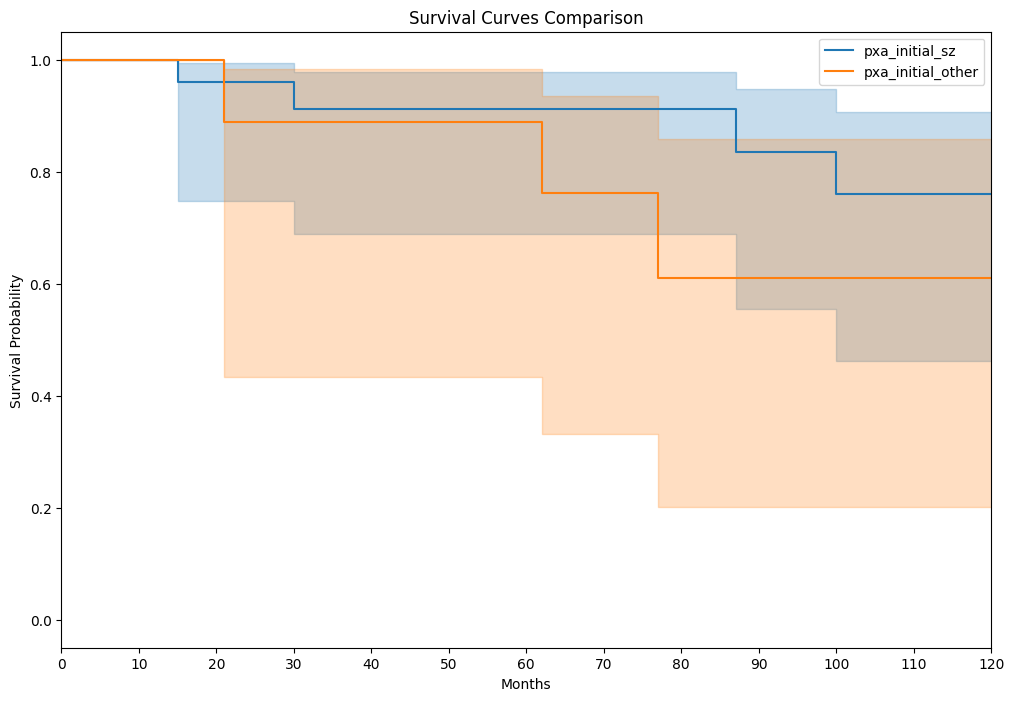

Log-rank test p-value: 0.051767670537929536


In [105]:
import pandas as pd
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test
import matplotlib.pyplot as plt

# Assuming pxa_initial_sz and pxa_initial_other are your DataFrames

# Create Kaplan-Meier fitter instances
kmf_sz = KaplanMeierFitter()
kmf_other = KaplanMeierFitter()

# Fit the data for pxa_initial_sz
kmf_sz.fit(durations=pxa_initial_sz['survival_months'], event_observed=pxa_initial_sz['death'], label='pxa_initial_sz')

# Fit the data for pxa_initial_other
kmf_other.fit(durations=pxa_initial_other['survival_months'], event_observed=pxa_initial_other['death'], label='pxa_initial_other')

# Plot the survival curves
plt.figure(figsize=(12, 8))
kmf_sz.plot_survival_function()
kmf_other.plot_survival_function()
plt.title('Survival Curves Comparison')
plt.xlabel('Months')
plt.ylabel('Survival Probability')
plt.xlim(0, 120)  # Expand the x-axis to 120 months
plt.xticks(range(0, 121, 10))  # Set x-ticks to cover up to 120 months
plt.legend()
plt.show()

# Perform the log-rank test
results = logrank_test(pxa_initial_sz['survival_months'], pxa_initial_other['survival_months'], event_observed_A=pxa_initial_sz['death'], event_observed_B=pxa_initial_other['death'])
print(f"Log-rank test p-value: {results.p_value}")

### Add multiple comparisons

In [106]:
import pandas as pd
from scipy.stats import ttest_ind, mannwhitneyu, fisher_exact
from lifelines.statistics import logrank_test
from lifelines import CoxPHFitter
import numpy as np

# Assuming pxa_tre and pxa_no_tre are your DataFrames

# Add a 'group' column to distinguish between the two groups
pxa_tre['group'] = 1  # Seizure-Free group
pxa_no_tre['group'] = 0  # Not Seizure-Free group

# Combine the two DataFrames
pxa = pd.concat([pxa_tre, pxa_no_tre], ignore_index=True)

# Ensure continuous variables are numeric, converting non-numeric values to NaN
continuous_vars = ['presentation_1_age', 'tumor_size']
for var in continuous_vars:
    pxa[var] = pd.to_numeric(pxa[var], errors='coerce')

# Ensure categorical variables are properly formatted
categorical_vars = ['tumor_left', 'sex_female', 'tumor_frontal', 'tumor_temp_any', 
                    'tumor_parietal', 'tumor_occipital', 'tumor_insula', 'tumor_other_subcort', 'mut_BRAF_V600E', 
                    'tumor_grade_first_2', 'tmz_any', 'braf_any']

# Convert categorical variables to numeric values
for var in categorical_vars:
    pxa[var] = pd.to_numeric(pxa[var], errors='coerce')

# Function to perform statistical tests for continuous variables
def analyze_continuous_var(var):
    data = pxa.dropna(subset=[var]).copy()
    group1 = data[data['group'] == 1][var]
    group2 = data[data['group'] == 0][var]
    
    # Perform t-test or Mann-Whitney U test
    if np.all(np.isfinite(group1)) and np.all(np.isfinite(group2)):
        t_stat, p_value = ttest_ind(group1, group2)
    else:
        t_stat, p_value = mannwhitneyu(group1, group2)
    
    print(f"Covariate: {var}")
    print(f"Group 1 (Seizure-Free): Mean = {group1.mean()}, Standard Deviation = {group1.std()}")
    print(f"Group 2 (Not Seizure-Free): Mean = {group2.mean()}, Standard Deviation = {group2.std()}")
    print(f"t-test/Mann-Whitney U test for {var}: p-value={p_value}\n")

# Function to perform statistical tests for categorical variables
def analyze_categorical_var(var):
    data = pxa.dropna(subset=[var]).copy()
    
    # Drop rows with 'NR' in the categorical variables
    if var in ['mut_BRAF_V600E', 'tumor_grade_first_2']:
        data = data[data[var] != 'NR']
    
    group1 = data[data['group'] == 1][var]
    group2 = data[data['group'] == 0][var]
    
    # Debugging statements to check the data
    print(f"Analyzing {var}")
    print(f"Group 1 (Seizure-Free): {group1.value_counts()}")
    print(f"Group 2 (Not Seizure-Free): {group2.value_counts()}")
    
    # Calculate the total numbers of 1s and 0s in each group
    total_1_group1 = group1.sum()
    total_0_group1 = len(group1) - total_1_group1
    total_1_group2 = group2.sum()
    total_0_group2 = len(group2) - total_1_group2
    
    # Create the contingency table
    contingency_table = [
        [total_1_group1, total_0_group1],
        [total_1_group2, total_0_group2]
    ]
    
    # Perform Fisher's Exact Test
    _, p_value = fisher_exact(contingency_table)
    
    print(f"Covariate: {var}")
    print(f"Group 1 (Seizure-Free): Total 1s = {total_1_group1}, Proportion 1s = {total_1_group1 / (total_1_group1 + total_0_group1):.2f}")
    print(f"Group 2 (Not Seizure-Free): Total 1s = {total_1_group2}, Proportion 1s = {total_1_group2 / (total_1_group2 + total_0_group2):.2f}")
    print(f"Fisher's Exact Test for {var}: p-value={p_value}\n")

# Analyze continuous variables
for var in continuous_vars:
    analyze_continuous_var(var)

# Analyze categorical variables
for var in categorical_vars:
    if var in pxa.columns:
        analyze_categorical_var(var)
    else:
        print(f"Variable {var} is not present in the dataset and will be skipped.\n")

# Perform multiple comparisons analysis of the log-rank test between the pxa_tre and pxa_no_tre groups
results = logrank_test(pxa_tre['survival_months'], pxa_no_tre['survival_months'], event_observed_A=pxa_tre['death'], event_observed_B=pxa_no_tre['death'])
print(f"Log-rank test p-value: {results.p_value}")

# Fit a Cox proportional hazards model to adjust for covariates
coxph = CoxPHFitter()
# Select relevant columns for the Cox model
cox_columns = ['survival_months', 'death', 'group'] + continuous_vars + categorical_vars
# Drop rows with any NaN values in the selected columns
cox_data = pxa[cox_columns].dropna()

# Fit the Cox model
coxph.fit(cox_data, duration_col='survival_months', event_col='death')

# Print the summary of the Cox model
coxph.print_summary()

# Extract the p-value for the 'group' variable (treatment effect)
adjusted_p_value = coxph.summary.loc['group', 'p']
print(f"Adjusted p-value for survival between pxa_tre and pxa_no_tre: {adjusted_p_value}")

/var/folders/wz/rwjf4bd179728l094_dm2yq40000gn/T/ipykernel_17208/1407547100.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pxa_tre['group'] = 1  # Seizure-Free group
/var/folders/wz/rwjf4bd179728l094_dm2yq40000gn/T/ipykernel_17208/1407547100.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pxa_no_tre['group'] = 0  # Not Seizure-Free group


Covariate: presentation_1_age
Group 1 (Seizure-Free): Mean = 22.814814814814813, Standard Deviation = 13.283989892512997
Group 2 (Not Seizure-Free): Mean = 25.75, Standard Deviation = 7.9417522355855805
t-test/Mann-Whitney U test for presentation_1_age: p-value=0.5587881886185271

Covariate: tumor_size
Group 1 (Seizure-Free): Mean = 2.8529411764705883, Standard Deviation = 1.749684845571776
Group 2 (Not Seizure-Free): Mean = 3.6833333333333336, Standard Deviation = 2.54983659607173
t-test/Mann-Whitney U test for tumor_size: p-value=0.3847472183161129

Analyzing tumor_left
Group 1 (Seizure-Free): tumor_left
1.0    17
0.0    10
Name: count, dtype: int64
Group 2 (Not Seizure-Free): tumor_left
0.0    5
1.0    3
Name: count, dtype: int64
Covariate: tumor_left
Group 1 (Seizure-Free): Total 1s = 17.0, Proportion 1s = 0.63
Group 2 (Not Seizure-Free): Total 1s = 3.0, Proportion 1s = 0.38
Fisher's Exact Test for tumor_left: p-value=0.2463595914652644

Analyzing sex_female
Group 1 (Seizure-Free):

/opt/anaconda3/envs/imaging/lib/python3.12/site-packages/lifelines/fitters/coxph_fitter.py:1614: ConvergenceWarning: Newton-Raphson failed to converge sufficiently. Please see the following tips in the lifelines documentation: https://lifelines.readthedocs.io/en/latest/Examples.html#problems-with-convergence-in-the-cox-proportional-hazard-model
  warnings.warn(


<lifelines.CoxPHFitter: fitted with 23 total observations, 16 right-censored observations>
             duration col = 'survival_months'
                event col = 'death'
      baseline estimation = breslow
   number of observations = 23
number of events observed = 7
   partial log-likelihood = -10.29
         time fit was run = 2025-03-13 22:16:26 UTC

---
                     coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                            
group                1.68      5.37      3.10           -4.39            7.75                0.01             2323.10
presentation_1_age  -0.08      0.92      0.11           -0.29            0.13                0.75                1.14
tumor_size           0.26      1.29      1.11           -1.92            2.43                0.15               11.39
tumor_left          -1.28      0.28      2.69           -6.56            4.00                0.00               54.80
sex_female           0.21      1.24      1.94           -3.59            4.02                0.03               55.63
tumor_frontal        2.87     17.62      3.84           -4.66           10.40                0.01            32788.37
tumor_temp_any       2.87     17.56      2.53           -2.10            7.83                0.12             2508.09
tumor_parietal       2.95     19.08      3.01           -2.96            8.86                0.05             7026.57
tumor_occipital     -1.00      0.37      3.92           -8.67            6.68                0.00              794.23
tumor_insula         1.99      7.29      3.67           -5.20            9.17                0.01             9602.50
tumor_other_subcort  7.38   1611.62      7.39           -7.10           21.87                0.00            3.15e+09
mut_BRAF_V600E      -0.36      0.70      3.40           -7.03            6.32                0.00              553.59
tumor_grade_first_2 -2.02      0.13      2.24           -6.41            2.38                0.00               10.76
tmz_any             -2.76      0.06      3.48           -9.58            4.06                0.00               58.09
braf_any             1.98      7.25      2.63           -3.18            7.14                0.04             1260.40

                     cmp to     z    p  -log2(p)
covariate                                       
group                  0.00  0.54 0.59      0.77
presentation_1_age     0.00 -0.74 0.46      1.12
tumor_size             0.00  0.23 0.82      0.29
tumor_left             0.00 -0.47 0.64      0.65
sex_female             0.00  0.11 0.91      0.13
tumor_frontal          0.00  0.75 0.46      1.14
tumor_temp_any         0.00  1.13 0.26      1.96
tumor_parietal         0.00  0.98 0.33      1.61
tumor_occipital        0.00 -0.25 0.80      0.32
tumor_insula           0.00  0.54 0.59      0.77
tumor_other_subcort    0.00  1.00 0.32      1.65
mut_BRAF_V600E         0.00 -0.10 0.92      0.13
tumor_grade_first_2    0.00 -0.90 0.37      1.44
tmz_any                0.00 -0.79 0.43      1.23
braf_any               0.00  0.75 0.45      1.15
---
Concordance = 0.95
Partial AIC = 50.58
log-likelihood ratio test = 12.56 on 15 df
-log2(p) of ll-ratio test = 0.65

Adjusted p-value for survival between pxa_tre and pxa_no_tre: 0.5873048748956673


### Survival analysis for with TRE vs. without TRE

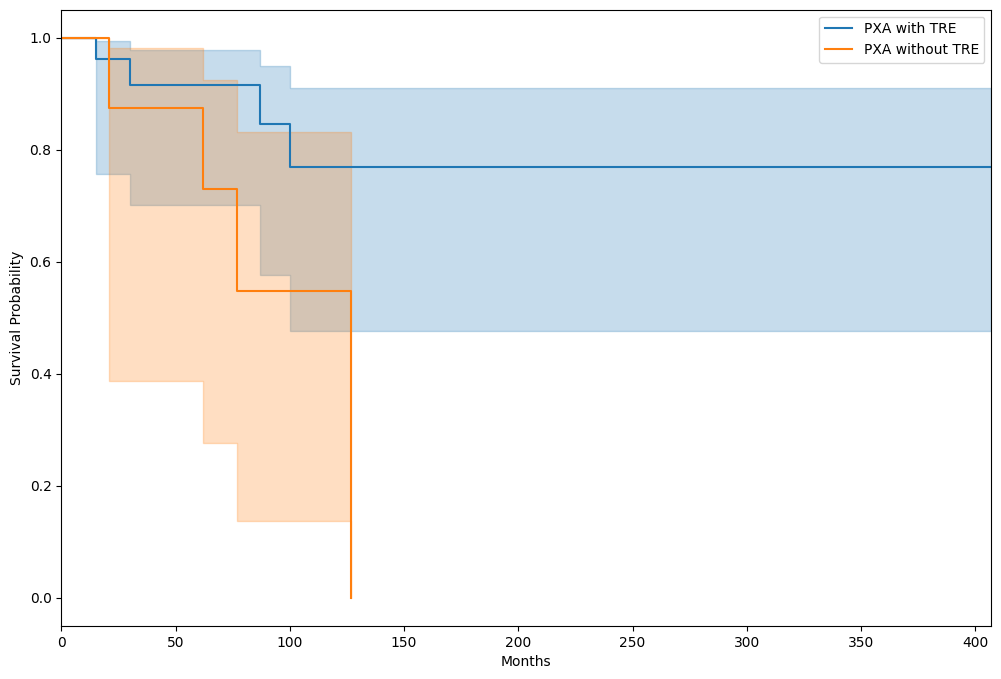

Log-rank test p-value: 0.020500043722310193


In [107]:
import pandas as pd
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test
import matplotlib.pyplot as plt

# Assuming pxa_tre and pxa_no_tre are your DataFrames

# Create Kaplan-Meier fitter instances
kmf_tre = KaplanMeierFitter()
kmf_no_tre = KaplanMeierFitter()

# Fit the data for pxa_tre
kmf_tre.fit(durations=pxa_tre['survival_months'], event_observed=pxa_tre['death'], label='PXA with TRE')

# Fit the data for pxa_no_tre
kmf_no_tre.fit(durations=pxa_no_tre['survival_months'], event_observed=pxa_no_tre['death'], label='PXA without TRE')

# Plot the survival curves
plt.figure(figsize=(12, 8))
kmf_tre.plot_survival_function()
kmf_no_tre.plot_survival_function()
plt.xlabel('Months')
plt.ylabel('Survival Probability')
plt.xlim(0, 407)  # Expand the x-axis to 407 months
plt.xticks(range(0, 408, 50))  # Set x-ticks to cover up to 407 months with intervals of 50 months
plt.legend()
plt.show()

# Perform the log-rank test
results = logrank_test(pxa_tre['survival_months'], pxa_no_tre['survival_months'], event_observed_A=pxa_tre['death'], event_observed_B=pxa_no_tre['death'])
print(f"Log-rank test p-value: {results.p_value}")

### Add multiple comparisons

In [108]:
import pandas as pd
from scipy.stats import ttest_ind, mannwhitneyu, fisher_exact
from lifelines.statistics import logrank_test
from lifelines import CoxPHFitter
import numpy as np

# Assuming pxa_tre and pxa_no_tre are your DataFrames

# Add a 'group' column to distinguish between the two groups
pxa_tre['group'] = 1  # Seizure-Free group
pxa_no_tre['group'] = 0  # Not Seizure-Free group

# Combine the two DataFrames
pxa = pd.concat([pxa_tre, pxa_no_tre], ignore_index=True)

# Ensure continuous variables are numeric, converting non-numeric values to NaN
continuous_vars = ['presentation_1_age', 'tumor_size']
for var in continuous_vars:
    pxa[var] = pd.to_numeric(pxa[var], errors='coerce')

# Ensure categorical variables are properly formatted
categorical_vars = ['tumor_left', 'sex_female', 'tumor_frontal', 'tumor_temp_any', 
                    'tumor_parietal', 'tumor_occipital', 'tumor_insula', 'tumor_other_subcort', 'mut_BRAF_V600E', 
                    'tumor_grade_first_2']

# Convert categorical variables to numeric values
for var in categorical_vars:
    pxa[var] = pd.to_numeric(pxa[var], errors='coerce')

# Function to perform statistical tests for continuous variables
def analyze_continuous_var(var):
    data = pxa.dropna(subset=[var]).copy()
    group1 = data[data['group'] == 1][var]
    group2 = data[data['group'] == 0][var]
    
    # Perform t-test or Mann-Whitney U test
    if np.all(np.isfinite(group1)) and np.all(np.isfinite(group2)):
        t_stat, p_value = ttest_ind(group1, group2)
    else:
        t_stat, p_value = mannwhitneyu(group1, group2)
    
    print(f"Covariate: {var}")
    print(f"Group 1 (Seizure-Free): Mean = {group1.mean()}, Standard Deviation = {group1.std()}")
    print(f"Group 2 (Not Seizure-Free): Mean = {group2.mean()}, Standard Deviation = {group2.std()}")
    print(f"t-test/Mann-Whitney U test for {var}: p-value={p_value}\n")

# Function to perform statistical tests for categorical variables
def analyze_categorical_var(var):
    data = pxa.dropna(subset=[var]).copy()
    
    # Drop rows with 'NR' in the categorical variables
    if var in ['mut_BRAF_V600E', 'tumor_grade_first_2']:
        data = data[data[var] != 'NR']
    
    group1 = data[data['group'] == 1][var]
    group2 = data[data['group'] == 0][var]
    
    # Debugging statements to check the data
    print(f"Analyzing {var}")
    print(f"Group 1 (Seizure-Free): {group1.value_counts()}")
    print(f"Group 2 (Not Seizure-Free): {group2.value_counts()}")
    
    # Calculate the total numbers of 1s and 0s in each group
    total_1_group1 = group1.sum()
    total_0_group1 = len(group1) - total_1_group1
    total_1_group2 = group2.sum()
    total_0_group2 = len(group2) - total_1_group2
    
    # Create the contingency table
    contingency_table = [
        [total_1_group1, total_0_group1],
        [total_1_group2, total_0_group2]
    ]
    
    # Perform Fisher's Exact Test
    _, p_value = fisher_exact(contingency_table)
    
    print(f"Covariate: {var}")
    print(f"Group 1 (Seizure-Free): Total 1s = {total_1_group1}, Proportion 1s = {total_1_group1 / (total_1_group1 + total_0_group1):.2f}")
    print(f"Group 2 (Not Seizure-Free): Total 1s = {total_1_group2}, Proportion 1s = {total_1_group2 / (total_1_group2 + total_0_group2):.2f}")
    print(f"Fisher's Exact Test for {var}: p-value={p_value}\n")

# Analyze continuous variables
for var in continuous_vars:
    analyze_continuous_var(var)

# Analyze categorical variables
for var in categorical_vars:
    if var in pxa.columns:
        analyze_categorical_var(var)
    else:
        print(f"Variable {var} is not present in the dataset and will be skipped.\n")

# Perform multiple comparisons analysis of the log-rank test between the pxa_tre and pxa_no_tre groups
results = logrank_test(pxa_tre['survival_months'], pxa_no_tre['survival_months'], event_observed_A=pxa_tre['death'], event_observed_B=pxa_no_tre['death'])
print(f"Log-rank test p-value: {results.p_value}")

# Fit a Cox proportional hazards model to adjust for covariates
coxph = CoxPHFitter()
# Select relevant columns for the Cox model
cox_columns = ['survival_months', 'death', 'group'] + continuous_vars + categorical_vars
# Drop rows with any NaN values in the selected columns
cox_data = pxa[cox_columns].dropna()

# Fit the Cox model
coxph.fit(cox_data, duration_col='survival_months', event_col='death')

# Print the summary of the Cox model
coxph.print_summary()

# Extract the p-value for the 'group' variable (treatment effect)
adjusted_p_value = coxph.summary.loc['group', 'p']
print(f"Adjusted p-value for survival between pxa_tre and pxa_no_tre: {adjusted_p_value}")

Covariate: presentation_1_age
Group 1 (Seizure-Free): Mean = 22.814814814814813, Standard Deviation = 13.283989892512997
Group 2 (Not Seizure-Free): Mean = 25.75, Standard Deviation = 7.9417522355855805
t-test/Mann-Whitney U test for presentation_1_age: p-value=0.5587881886185271

Covariate: tumor_size
Group 1 (Seizure-Free): Mean = 2.8529411764705883, Standard Deviation = 1.749684845571776
Group 2 (Not Seizure-Free): Mean = 3.6833333333333336, Standard Deviation = 2.54983659607173
t-test/Mann-Whitney U test for tumor_size: p-value=0.3847472183161129

Analyzing tumor_left
Group 1 (Seizure-Free): tumor_left
1.0    17
0.0    10
Name: count, dtype: int64
Group 2 (Not Seizure-Free): tumor_left
0.0    5
1.0    3
Name: count, dtype: int64
Covariate: tumor_left
Group 1 (Seizure-Free): Total 1s = 17.0, Proportion 1s = 0.63
Group 2 (Not Seizure-Free): Total 1s = 3.0, Proportion 1s = 0.38
Fisher's Exact Test for tumor_left: p-value=0.2463595914652644

Analyzing sex_female
Group 1 (Seizure-Free):

/opt/anaconda3/envs/imaging/lib/python3.12/site-packages/lifelines/fitters/coxph_fitter.py:1614: ConvergenceWarning: Newton-Raphson failed to converge sufficiently. Please see the following tips in the lifelines documentation: https://lifelines.readthedocs.io/en/latest/Examples.html#problems-with-convergence-in-the-cox-proportional-hazard-model
  warnings.warn(


<lifelines.CoxPHFitter: fitted with 23 total observations, 16 right-censored observations>
             duration col = 'survival_months'
                event col = 'death'
      baseline estimation = breslow
   number of observations = 23
number of events observed = 7
   partial log-likelihood = -2.61
         time fit was run = 2025-03-13 22:16:26 UTC

---
                     coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                            
group               -1.02      0.36     14.44          -29.32           27.29                0.00            7.11e+11
presentation_1_age  -0.32      0.73      0.43           -1.17            0.53                0.31                1.70
tumor_size           0.57      1.77      4.02           -7.32            8.46                0.00             4707.06
tumor_left           2.41     11.17      6.81          -10.93           15.75                0.00            6.95e+06
sex_female          -3.23      0.04      6.16          -15.31            8.85                0.00             7008.13
tumor_frontal       -1.65      0.19      9.64          -20.54           17.24                0.00            3.07e+07
tumor_temp_any      11.52  1.00e+05      6.51           -1.23           24.27                0.29            3.46e+10
tumor_parietal       9.77  17450.40      9.78           -9.39           28.93                0.00            3.65e+12
tumor_occipital     -0.47      0.62     18.83          -37.37           36.43                0.00            6.62e+15
tumor_insula         7.19   1325.88     10.40          -13.20           27.58                0.00            9.52e+11
tumor_other_subcort 10.08  23896.59      9.22           -7.99           28.15                0.00            1.68e+12
mut_BRAF_V600E       1.62      5.05      8.17          -14.39           17.62                0.00            4.51e+07
tumor_grade_first_2 -4.94      0.01      7.71          -20.04           10.17                0.00            26114.98

                     cmp to     z    p  -log2(p)
covariate                                       
group                  0.00 -0.07 0.94      0.08
presentation_1_age     0.00 -0.73 0.47      1.10
tumor_size             0.00  0.14 0.89      0.17
tumor_left             0.00  0.35 0.72      0.47
sex_female             0.00 -0.52 0.60      0.74
tumor_frontal          0.00 -0.17 0.86      0.21
tumor_temp_any         0.00  1.77 0.08      3.71
tumor_parietal         0.00  1.00 0.32      1.65
tumor_occipital        0.00 -0.02 0.98      0.03
tumor_insula           0.00  0.69 0.49      1.03
tumor_other_subcort    0.00  1.09 0.27      1.87
mut_BRAF_V600E         0.00  0.20 0.84      0.25
tumor_grade_first_2    0.00 -0.64 0.52      0.94
---
Concordance = 1.00
Partial AIC = 31.23
log-likelihood ratio test = 27.91 on 13 df
-log2(p) of ll-ratio test = 6.75

Adjusted p-value for survival between pxa_tre and pxa_no_tre: 0.9439557291035131


### Tumor-directed therapy and survival

In [109]:
import pandas as pd
from scipy.stats import ttest_ind

# Assuming pxa_tre and pxa_no_tre are your DataFrames

# Function to calculate mean, standard deviation, and p-value for survival months
def analyze_survival(data, variable):
    # Filter data for the variable
    data_with_var = data[data[variable] == 1]
    data_without_var = data[data[variable] == 0]
    
    # Calculate mean and standard deviation for survival months
    mean_with_var = data_with_var['survival_months'].mean()
    std_with_var = data_with_var['survival_months'].std()
    mean_without_var = data_without_var['survival_months'].mean()
    std_without_var = data_without_var['survival_months'].std()
    
    # Perform t-test
    t_stat, p_value = ttest_ind(data_with_var['survival_months'], data_without_var['survival_months'], nan_policy='omit')
    
    # Print results
    print(f"Variable: {variable}")
    print(f"With {variable}: Mean = {mean_with_var:.2f} months, SD = {std_with_var:.2f} months")
    print(f"Without {variable}: Mean = {mean_without_var:.2f} months, SD = {std_without_var:.2f} months")
    print(f"t-test p-value: {p_value:.4f}\n")

# Analyze survival for tmz_initial, tmz_any, braf_initial, and braf_any
variables_to_analyze = ['tmz_initial', 'tmz_any', 'braf_initial', 'braf_any']
for var in variables_to_analyze:
    analyze_survival(pxa, var)

Variable: tmz_initial
With tmz_initial: Mean = 87.91 months, SD = 68.99 months
Without tmz_initial: Mean = 106.08 months, SD = 104.92 months
t-test p-value: 0.6046

Variable: tmz_any
With tmz_any: Mean = 80.89 months, SD = 59.23 months
Without tmz_any: Mean = 121.00 months, SD = 119.79 months
t-test p-value: 0.2141

Variable: braf_initial
With braf_initial: Mean = 54.50 months, SD = 40.31 months
Without braf_initial: Mean = 103.15 months, SD = 96.37 months
t-test p-value: 0.4876

Variable: braf_any
With braf_any: Mean = 61.56 months, SD = 28.12 months
Without braf_any: Mean = 113.81 months, SD = 105.59 months
t-test p-value: 0.1555

